In [1]:
import pandas as pd
# import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter (action = 'ignore')
# plt.style.use ('seaborn')
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv ("Health index.csv")
data

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
0        2845    5860     7406   32  1344     16684    5467           7    0   
1       12886      61      877   83   864         4     305           0    0   
2        2820   16400      144  257  1080       206      11        2190   11   
3        1099      70      545  184  1402         6     230           0    5   
4        3210    3570      160  360  2130         4      43           4    3   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
465        15     227        3   60   853         3      84           0   28   
466        15     334        3   64   622         3     108           0   12   
467        15    1280        2  675  2530         0       0           0    8   
468        15     169        5   77   532         0      72           0   11   
469        15     308        3   64   581         5      27           0   18   

     Health_index  
0            95.2  
1            85.5  
2            85.3  
3            85.3  
4            85.2  
..            ...  
465          13.4  
466          13.4  
467          13.4  
468          13.4  
469          13.4  

[470 rows x 10 columns]

In [3]:
df = pd.DataFrame (data)
df

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
0        2845    5860     7406   32  1344     16684    5467           7    0   
1       12886      61      877   83   864         4     305           0    0   
2        2820   16400      144  257  1080       206      11        2190   11   
3        1099      70      545  184  1402         6     230           0    5   
4        3210    3570      160  360  2130         4      43           4    3   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
465        15     227        3   60   853         3      84           0   28   
466        15     334        3   64   622         3     108           0   12   
467        15    1280        2  675  2530         0       0           0    8   
468        15     169        5   77   532         0      72           0   11   
469        15     308        3   64   581         5      27           0   18   

     Health_index  
0            95.2  
1            85.5  
2            85.3  
3            85.3  
4            85.2  
..            ...  
465          13.4  
466          13.4  
467          13.4  
468          13.4  
469          13.4  

[470 rows x 10 columns]

In [4]:
df.shape

(470, 10)

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Hydrogen      470 non-null    int64  
 1   Oxigen        470 non-null    int64  
 2   Methane       470 non-null    int64  
 3   CO            470 non-null    int64  
 4   CO2           470 non-null    int64  
 5   Ethylene      470 non-null    int64  
 6   Ethane        470 non-null    int64  
 7   Acethylene    470 non-null    int64  
 8   H2O           470 non-null    int64  
 9   Health_index  470 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 36.8 KB


In [6]:
df.describe()

Hydrogen         Oxigen      Methane           CO           CO2  \
count    470.000000     470.000000   470.000000   470.000000    470.000000   
mean     404.261702    8357.372340    79.695745   244.000000   1816.414894   
std     2002.142678   14164.233283   489.320336   237.267485   2256.790519   
min        0.000000      57.000000     0.000000    10.000000     48.000000   
25%        4.000000     496.000000     2.000000    66.000000    641.750000   
50%        9.000000    3810.000000     3.000000   150.500000   1125.000000   
75%       34.000000   14875.000000     7.000000   361.750000   2257.500000   
max    23349.000000  249900.000000  7406.000000  1730.000000  24900.000000   

           Ethylene       Ethane   Acethylene         H2O  Health_index  
count    470.000000   470.000000   470.000000  470.000000    470.000000  
mean     162.923404    81.940426    91.491489   16.282979     27.504043  
std     1323.811504   342.573636   644.365828   17.115646     17.741458  
min        0.000000     0.000000     0.000000    0.000000     13.400000  
25%        0.000000     0.000000     0.000000    5.000000     13.400000  
50%        3.000000     4.000000     0.000000   12.000000     13.400000  
75%        6.000000    69.750000     0.000000   21.000000     38.550000  
max    16684.000000  5467.000000  9740.000000  183.000000     95.200000

In [7]:
def check(df):
    List=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        List.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(List)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

column   dtypes  nunique  sum_null
0      Hydrogen    int64      111         0
1        Oxigen    int64      382         0
2       Methane    int64       74         0
3            CO    int64      298         0
4           CO2    int64      374         0
5      Ethylene    int64       61         0
6        Ethane    int64      141         0
7    Acethylene    int64       26         0
8           H2O    int64       63         0
9  Health_index  float64       65         0

In [8]:
df.isna().sum()

Hydrogen        0
Oxigen          0
Methane         0
CO              0
CO2             0
Ethylene        0
Ethane          0
Acethylene      0
H2O             0
Health_index    0
dtype: int64

In [9]:
df.dropna (how = 'any')

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
0        2845    5860     7406   32  1344     16684    5467           7    0   
1       12886      61      877   83   864         4     305           0    0   
2        2820   16400      144  257  1080       206      11        2190   11   
3        1099      70      545  184  1402         6     230           0    5   
4        3210    3570      160  360  2130         4      43           4    3   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
465        15     227        3   60   853         3      84           0   28   
466        15     334        3   64   622         3     108           0   12   
467        15    1280        2  675  2530         0       0           0    8   
468        15     169        5   77   532         0      72           0   11   
469        15     308        3   64   581         5      27           0   18   

     Health_index  
0            95.2  
1            85.5  
2            85.3  
3            85.3  
4            85.2  
..            ...  
465          13.4  
466          13.4  
467          13.4  
468          13.4  
469          13.4  

[470 rows x 10 columns]

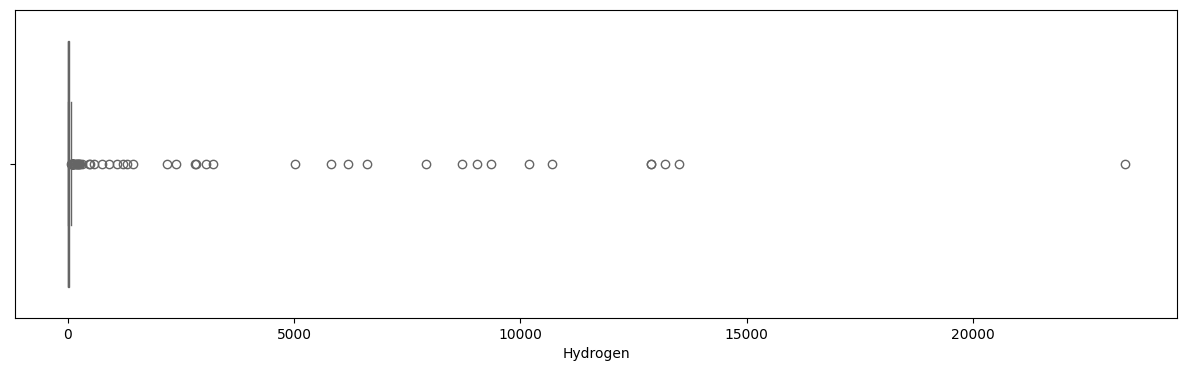

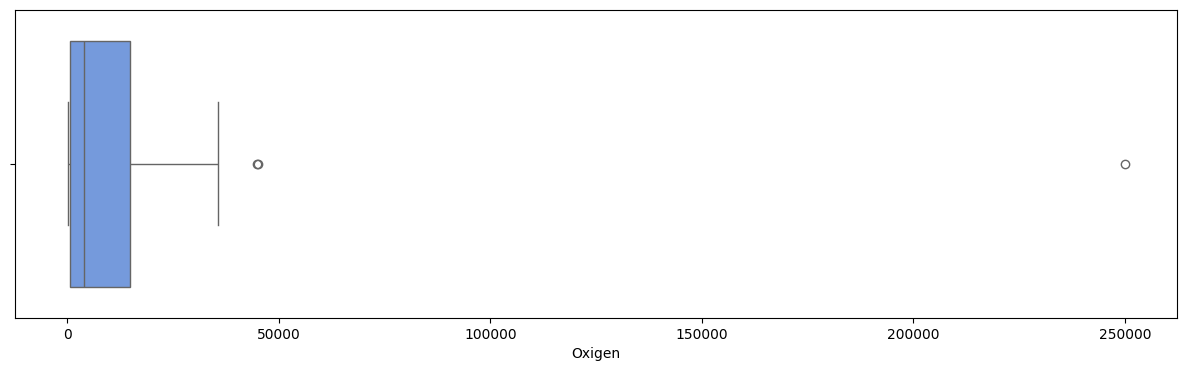

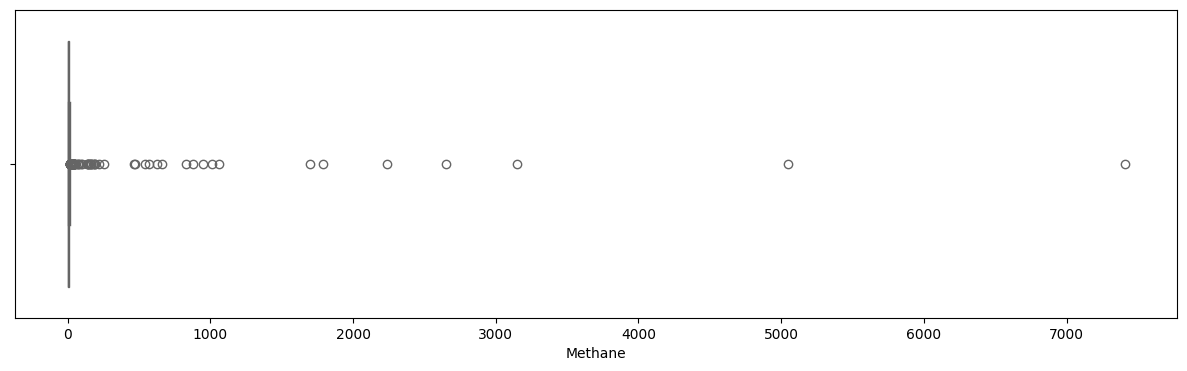

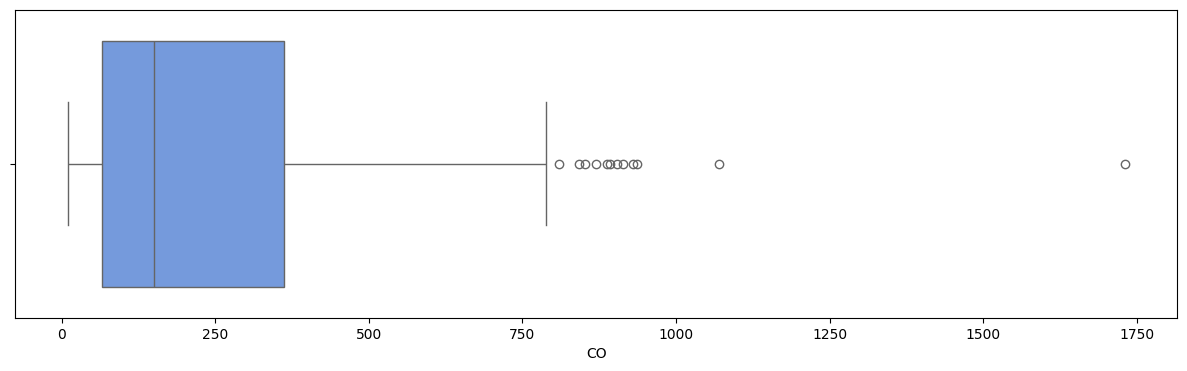

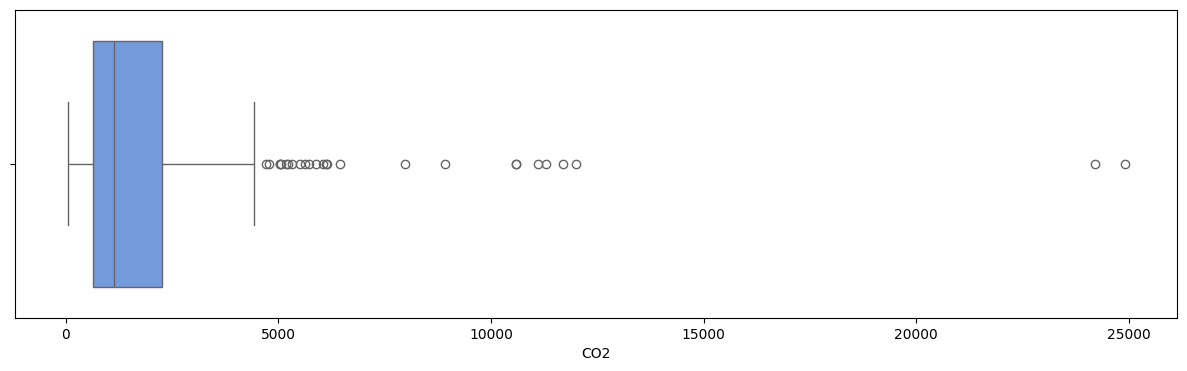

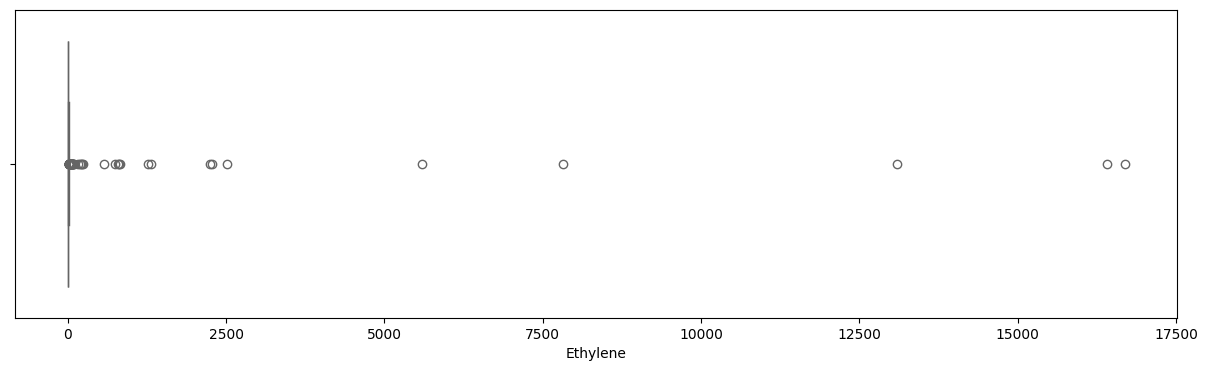

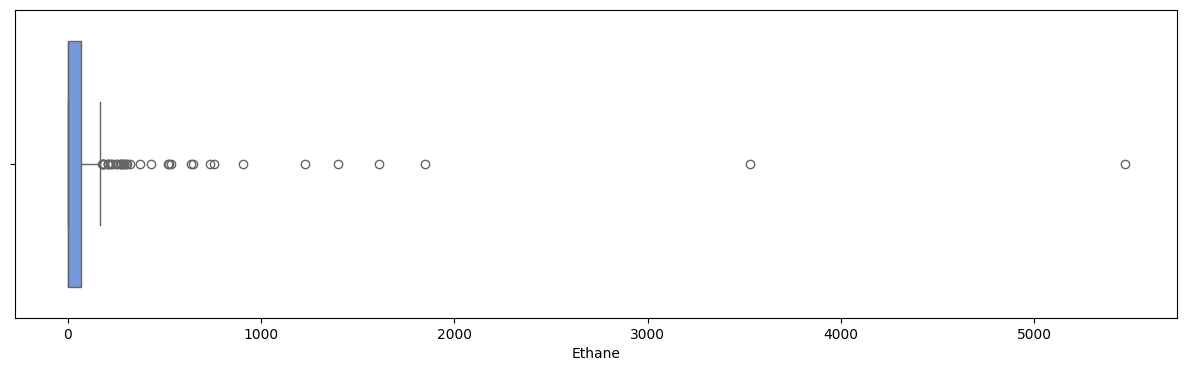

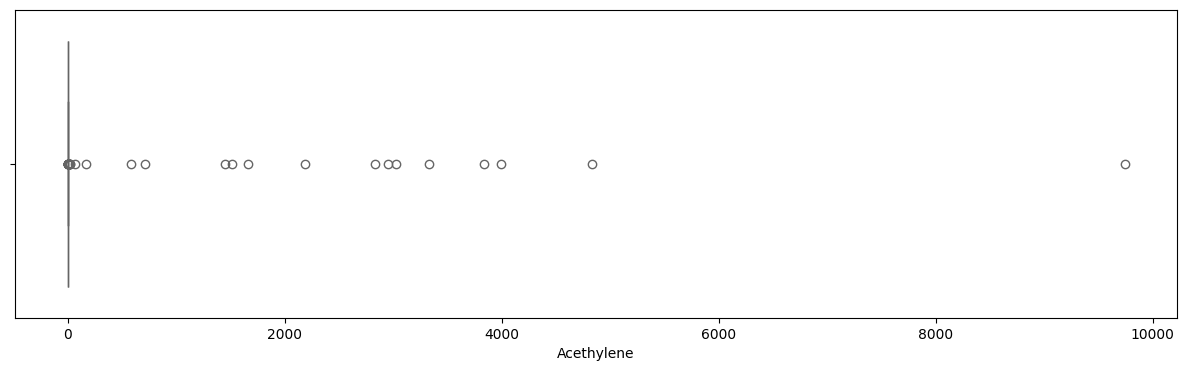

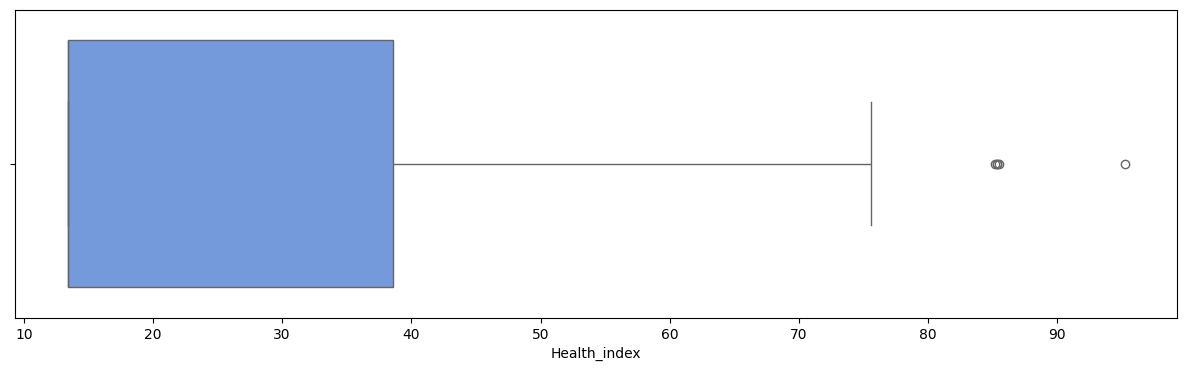

In [30]:
numerical = ['Hydrogen', 'Oxigen', 'Methane', 'CO', 'CO2', 'Ethylene', 'Ethane', 'Acethylene', 'Health_index']

for feature in numerical:
    plt.figure(figsize=[15, 4])
    sns.boxplot(x=feature, data=df, color='cornflowerblue')
    plt.show()

Hydrogen> 15000

Oxigen>40000

Methane>2000

CO>1000

CO2>15000

Ethylene>7500

Ethane>3000

Acethylene>6000

H2O>100

Health_index>80 là nhiễu

In [11]:
df1=df.index[(df['Hydrogen']>15000)]
df2=df.index[(df['Oxigen']>40000)]
df3=df.index[(df['Methane']>2000)]
df4=df.index[(df['CO']>1250)]
df5=df.index[(df['CO2']>15000)]
df6=df.index[(df['Ethylene']>7500)]
df7=df.index[(df['Ethane']>3000)]
df8=df.index[(df['Acethylene']>6000)]
df9=df.index[(df['H2O']>100)]
df10=df.index[(df['Health_index']>80)]

In [12]:
print(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10)

Index([13], dtype='int64') Index([45, 250, 395], dtype='int64') Index([0, 5, 13, 15, 16], dtype='int64') Index([19], dtype='int64') Index([19, 361], dtype='int64') Index([0, 14, 15, 16], dtype='int64') Index([0, 13], dtype='int64') Index([17], dtype='int64') Index([386], dtype='int64') Index([0, 1, 2, 3, 4], dtype='int64')


In [13]:
DF= df.drop([13,45,250,395,0,5,13,14,15,16,17,19,361,38,39,40,386,0,1,2,3,4])
DF

Hydrogen  Oxigen  Methane   CO   CO2  Ethylene  Ethane  Acethylene  H2O  \
6       10200   11900      573   87   611         0     162           0    5   
7           3   15459        5   68   902        12       2          13    6   
8          16    2470        8  520  2660         5       8           2    4   
9         488   11861       13   85  1957        29      23           0   10   
10          4   26100        1  206  1440        13       0          13    4   
..        ...     ...      ...  ...   ...       ...     ...         ...  ...   
465        15     227        3   60   853         3      84           0   28   
466        15     334        3   64   622         3     108           0   12   
467        15    1280        2  675  2530         0       0           0    8   
468        15     169        5   77   532         0      72           0   11   
469        15     308        3   64   581         5      27           0   18   

     Health_index  
6            75.6  
7            73.2  
8            72.8  
9            68.0  
10           63.4  
..            ...  
465          13.4  
466          13.4  
467          13.4  
468          13.4  
469          13.4  

[450 rows x 10 columns]

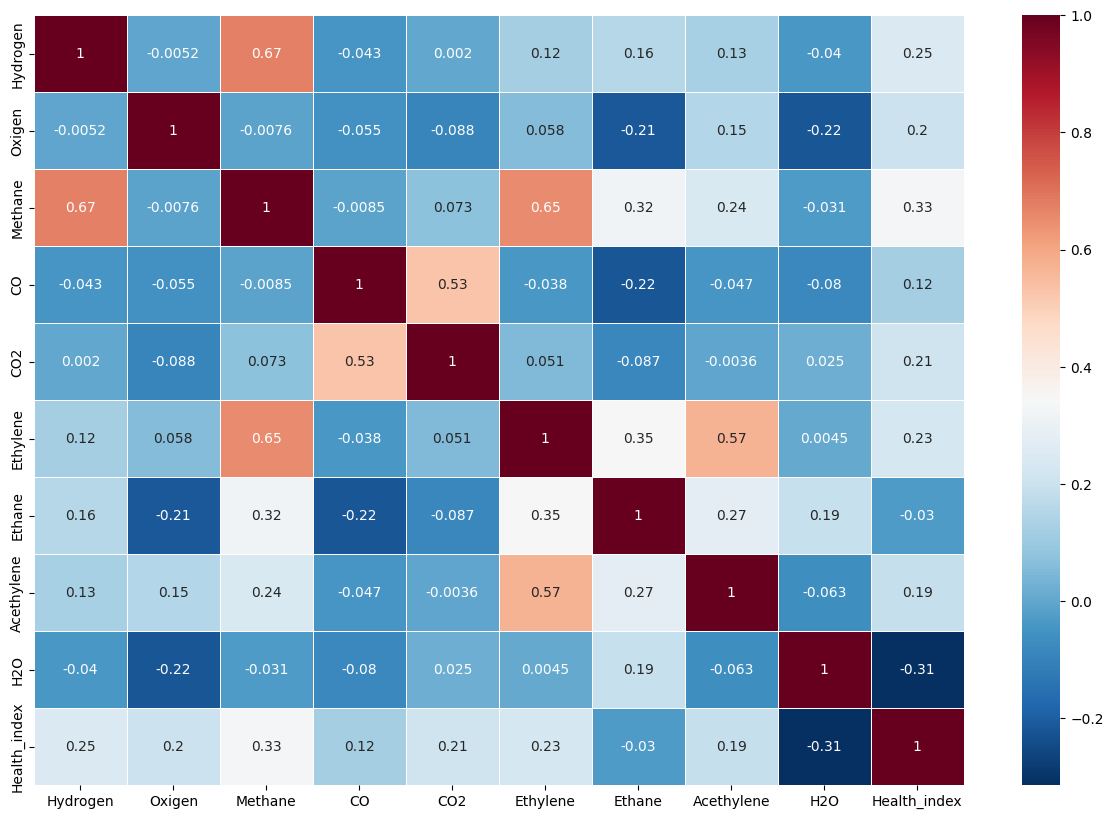

In [14]:
fig, ax = plt.subplots (figsize = (15,10)) 
sns.heatmap (DF.corr (), cmap = 'RdBu_r' , cbar = True , annot = True , linewidth = 0.5 ,ax = ax) 
plt.show ()

In [15]:
DF.corr()

Hydrogen    Oxigen   Methane        CO       CO2  Ethylene  \
Hydrogen      1.000000 -0.005214  0.673568 -0.042903  0.001979  0.118107   
Oxigen       -0.005214  1.000000 -0.007576 -0.054765 -0.088188  0.057993   
Methane       0.673568 -0.007576  1.000000 -0.008543  0.072545  0.652811   
CO           -0.042903 -0.054765 -0.008543  1.000000  0.530268 -0.038468   
CO2           0.001979 -0.088188  0.072545  0.530268  1.000000  0.051232   
Ethylene      0.118107  0.057993  0.652811 -0.038468  0.051232  1.000000   
Ethane        0.155776 -0.211307  0.316555 -0.217895 -0.086651  0.345771   
Acethylene    0.125116  0.149600  0.237006 -0.046714 -0.003637  0.568997   
H2O          -0.040374 -0.217306 -0.031199 -0.080034  0.024541  0.004451   
Health_index  0.246487  0.200875  0.329122  0.119697  0.205601  0.227701   

                Ethane  Acethylene       H2O  Health_index  
Hydrogen      0.155776    0.125116 -0.040374      0.246487  
Oxigen       -0.211307    0.149600 -0.217306      0.200875  
Methane       0.316555    0.237006 -0.031199      0.329122  
CO           -0.217895   -0.046714 -0.080034      0.119697  
CO2          -0.086651   -0.003637  0.024541      0.205601  
Ethylene      0.345771    0.568997  0.004451      0.227701  
Ethane        1.000000    0.274784  0.193357     -0.030211  
Acethylene    0.274784    1.000000 -0.063310      0.186349  
H2O           0.193357   -0.063310  1.000000     -0.313900  
Health_index -0.030211    0.186349 -0.313900      1.000000

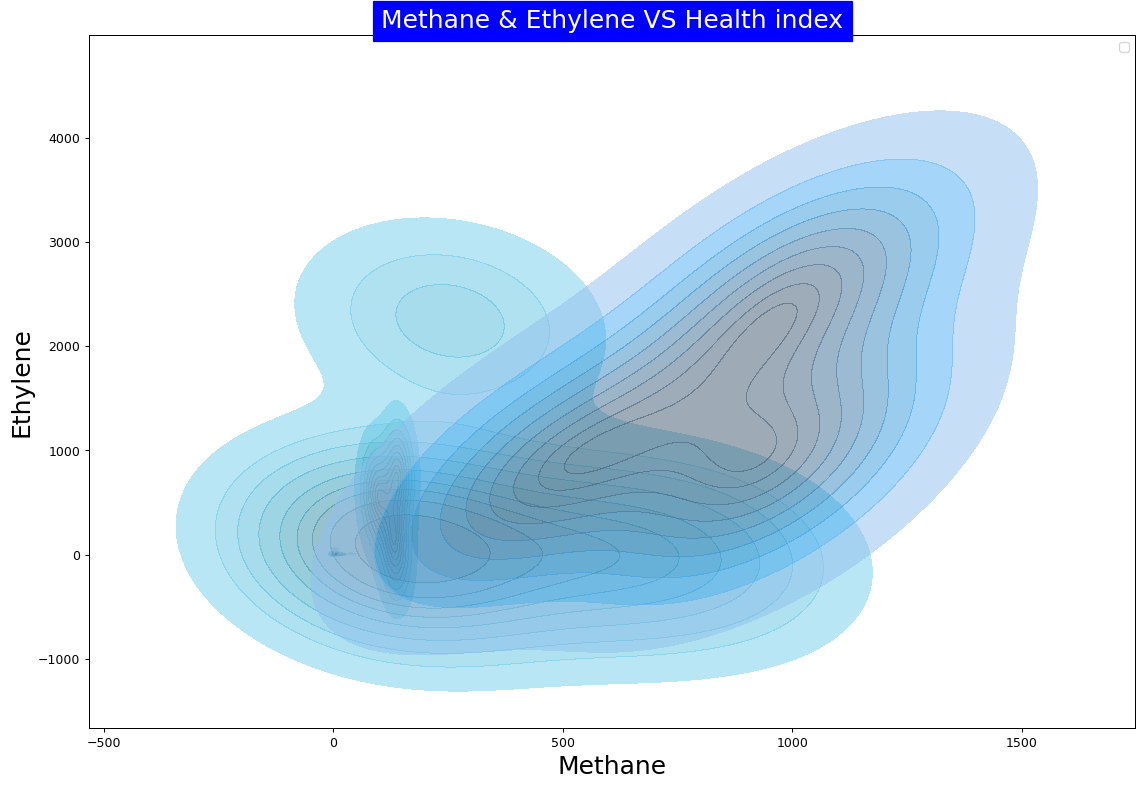

In [32]:
plt.figure (figsize = (15,10) , dpi = 90)
sns.kdeplot (data = DF , x = 'Methane' , y = 'Ethylene' , hue = 'Health_index' , shade = True , fill = True , common_norm = False , palette = 'crest' , alpha = 0.5 , linewidth = 0)
plt.xlabel ('Methane' , fontsize = 20)
plt.ylabel ('Ethylene' , fontsize = 20)
plt.legend (['Health_index'] , loc = 'best')
plt.title ('Methane & Ethylene VS Health index' , backgroundcolor = 'blue' , c = 'white' , fontsize = 20)
plt.grid
plt.show ()

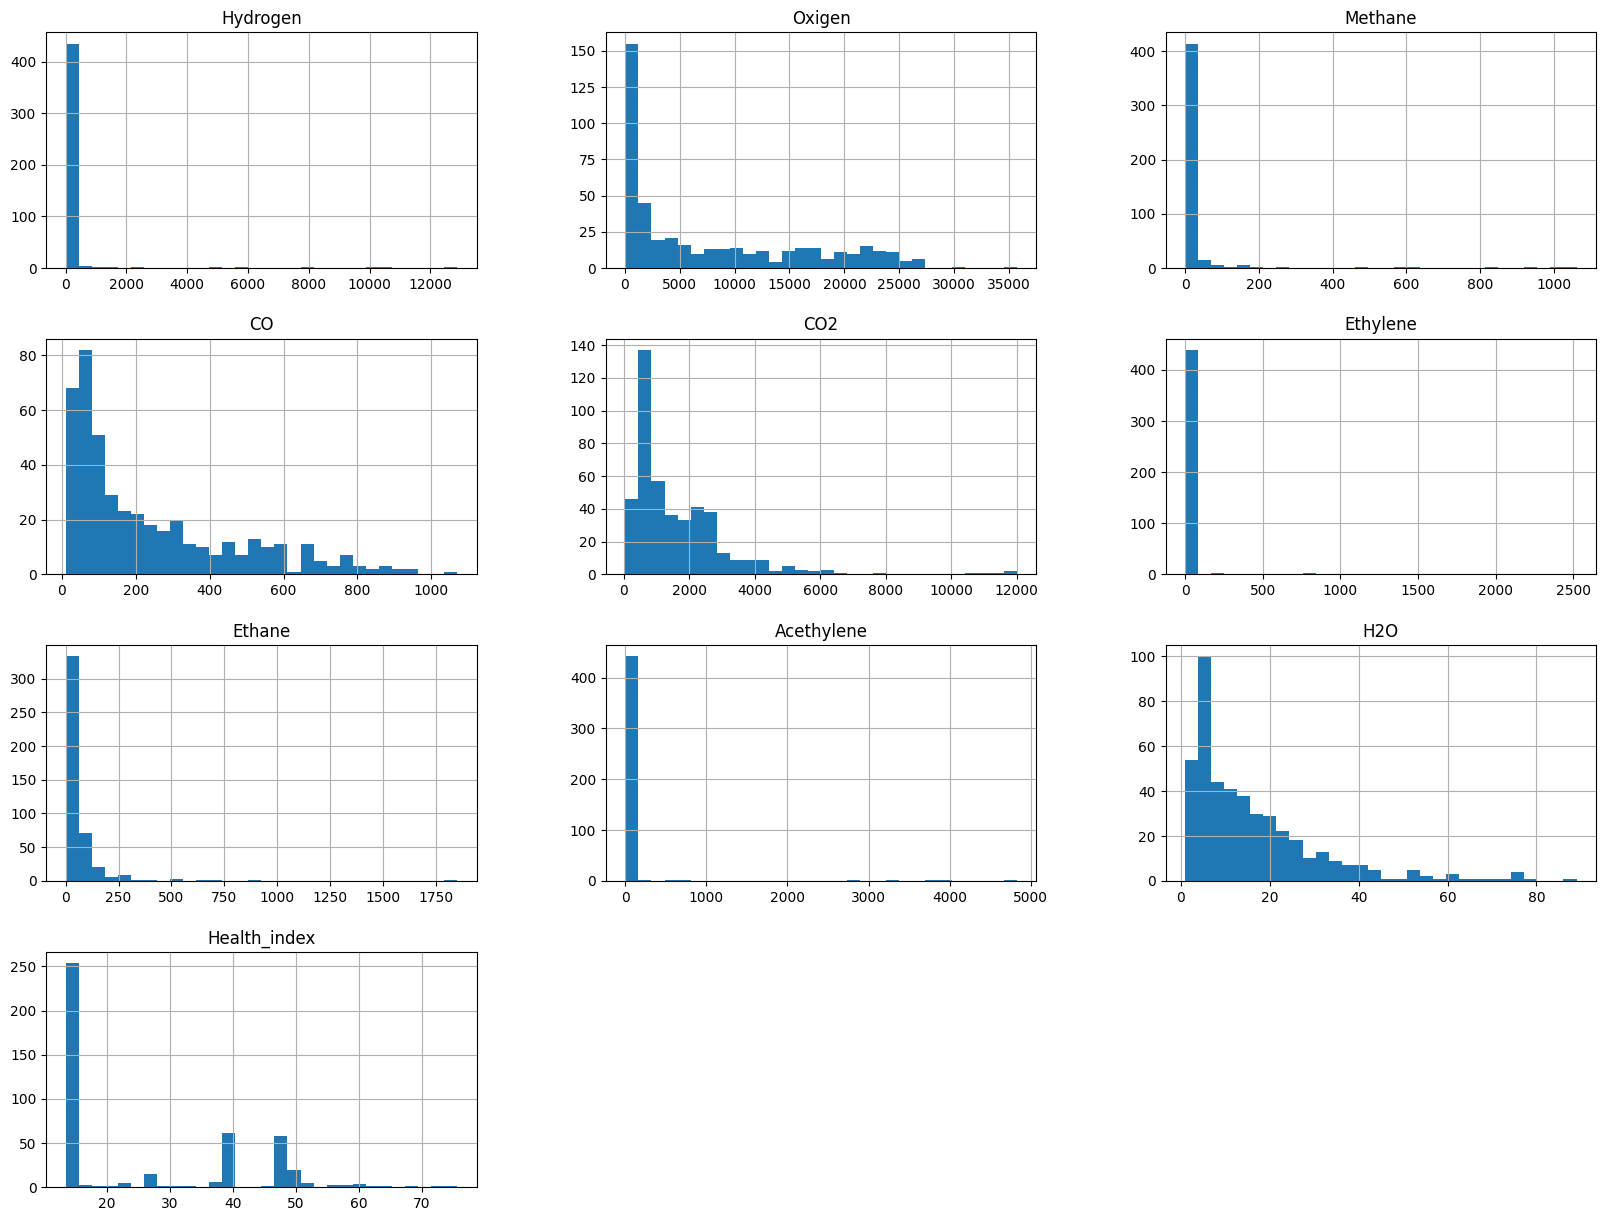

In [17]:
DF.hist(bins=30,figsize=(20,15))
plt.show()

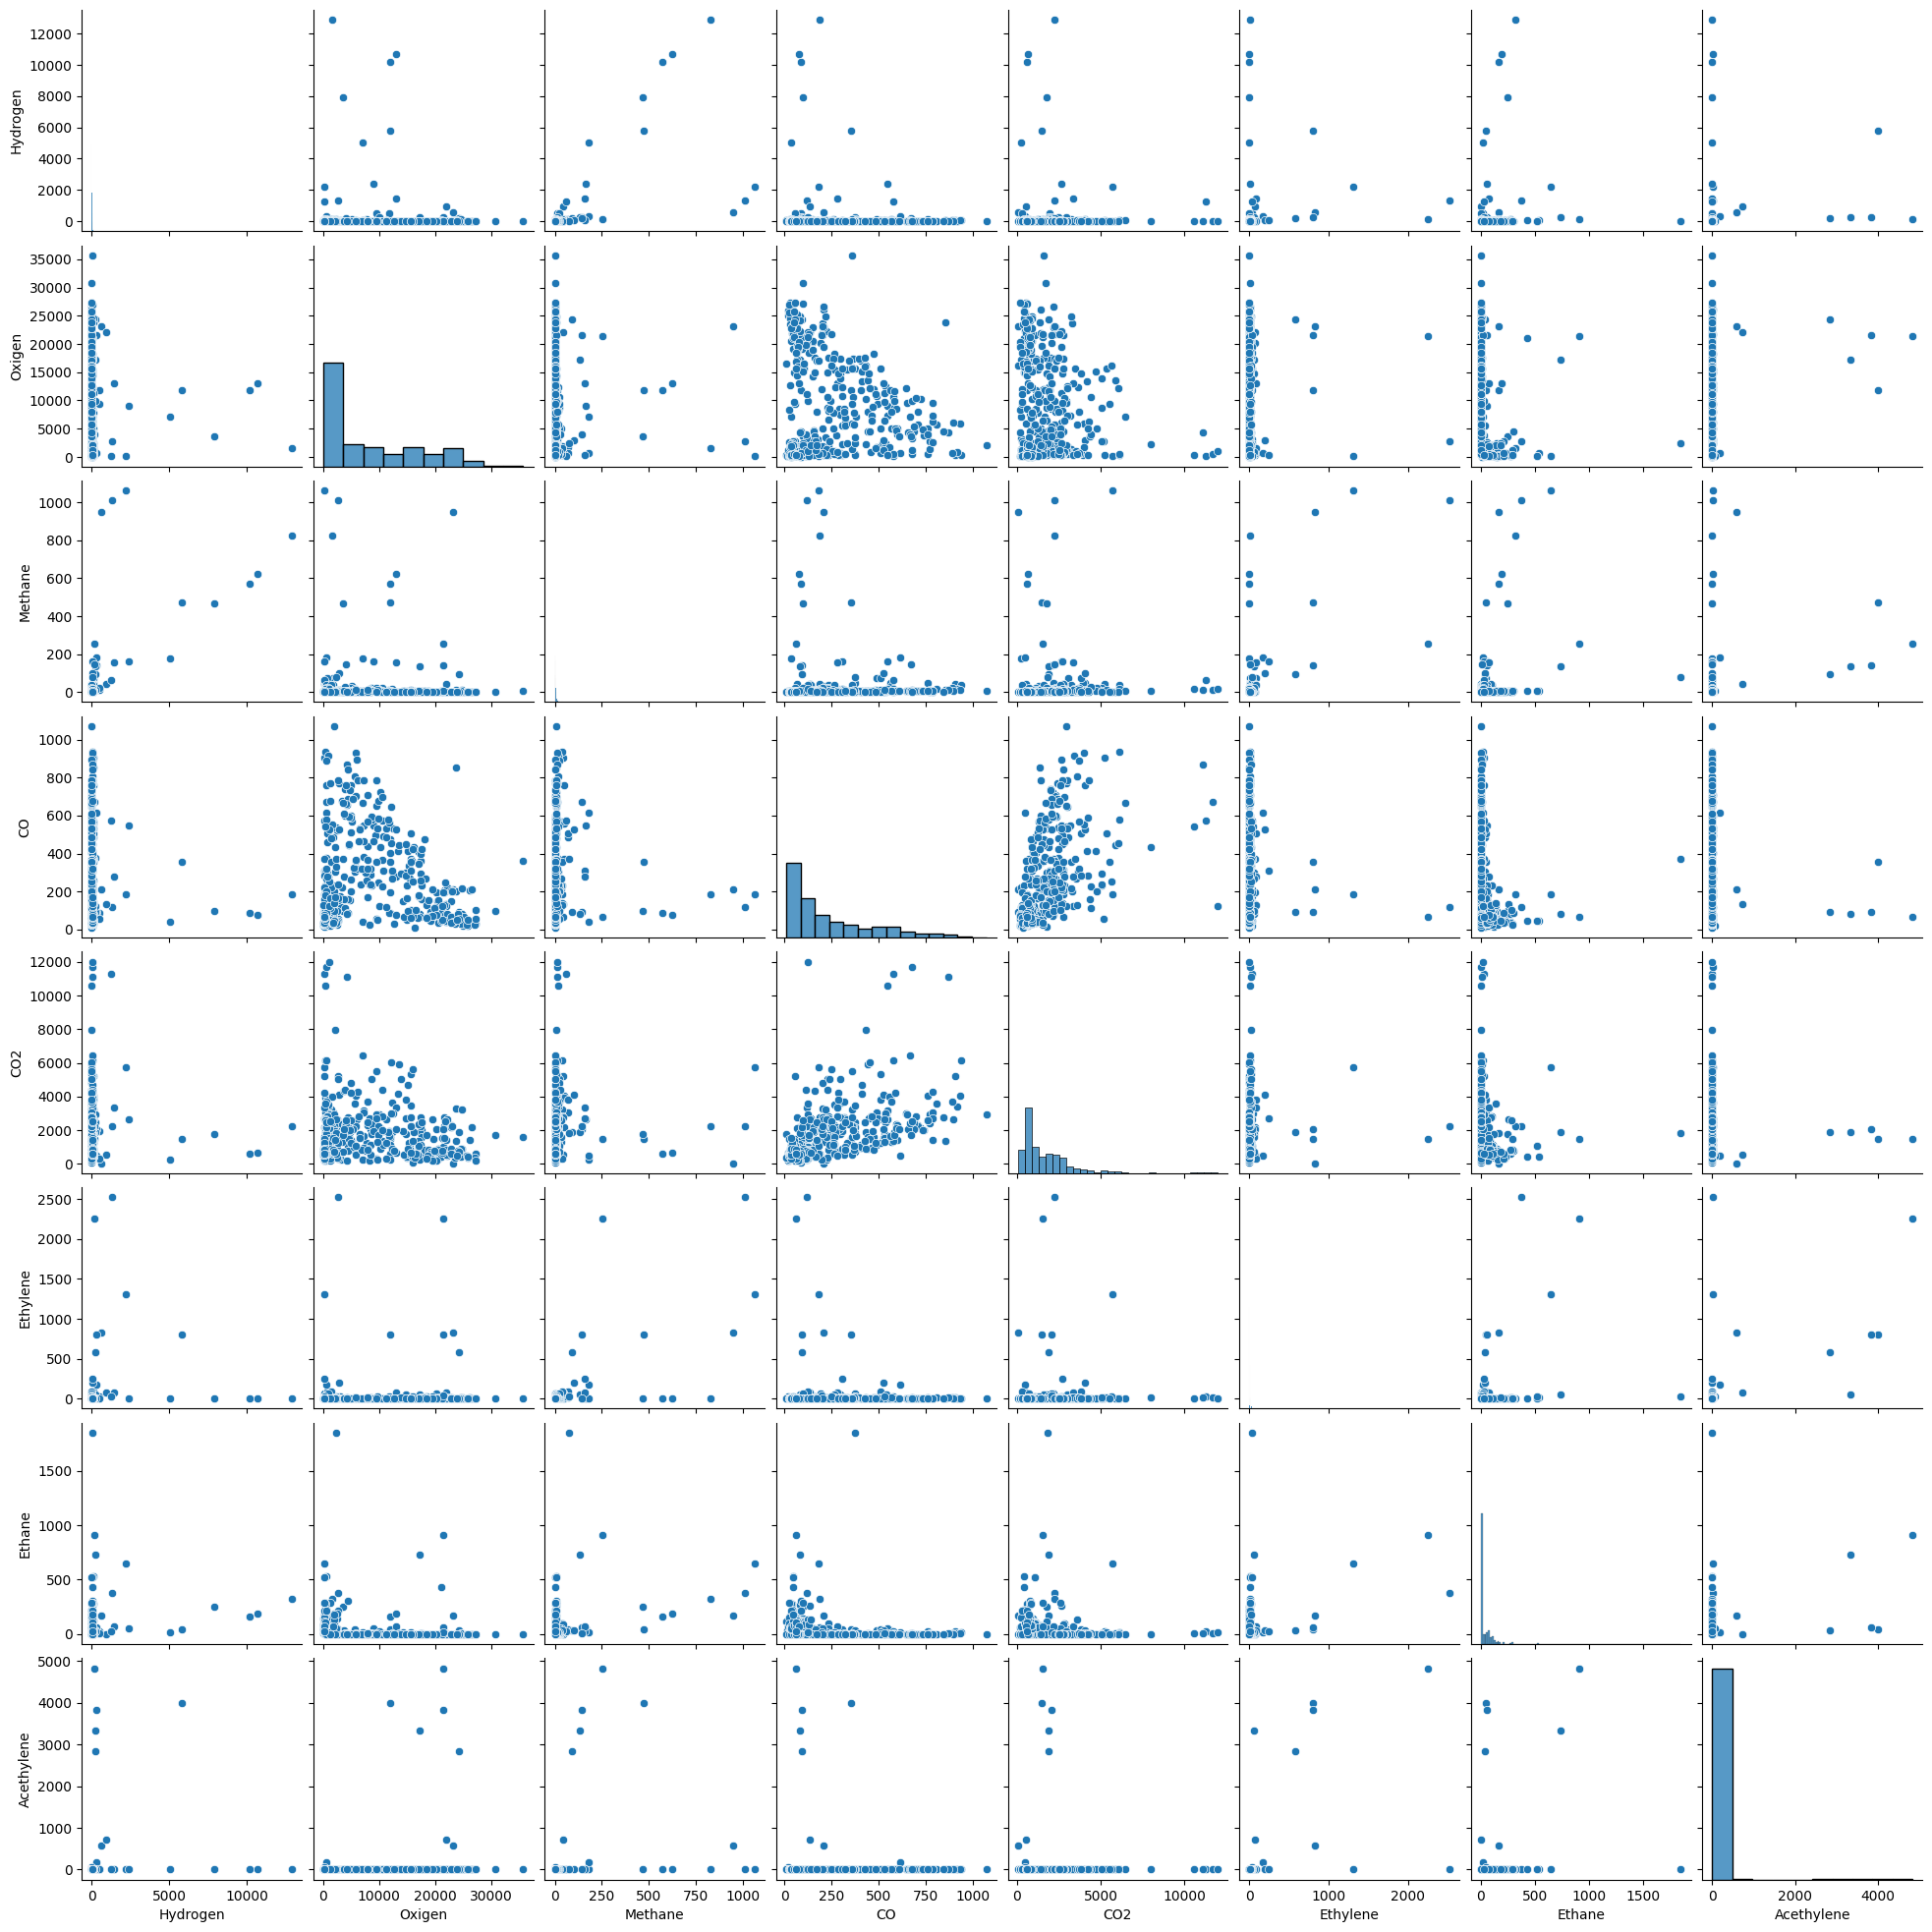

In [18]:
sns.pairplot(DF,
    x_vars=["Hydrogen", "Oxigen", "Methane", "CO","CO2", "Ethylene", "Ethane", "Acethylene"],
    y_vars=["Hydrogen", "Oxigen", "Methane", "CO","CO2", "Ethylene", "Ethane", "Acethylene"]
)

In [19]:
Df = DF.copy()

In [20]:
# scaler = StandardScaler()
# scaler.fit(Df)
# scaled_Df = pd.DataFrame(scaler.transform(Df),columns= Df.columns )

In [21]:
# scaled_Df.head()

In [22]:
x1 = Df.drop('Health_index', axis=1)
scaler1 = StandardScaler()
scaler1.fit(x1)
scaled_x1 = pd.DataFrame(scaler1.transform(x1), columns=x1.columns)
y1 = Df.Health_index.values.reshape(-1,1)
scaler2 = StandardScaler()
scaler2.fit(y1)
scaled_y1 = pd.DataFrame(scaler2.transform(y1), columns=['Health_index'])



In [23]:
x1_train , x1_test , y1_train , y1_test = train_test_split (scaled_x1 , scaled_y1 , test_size = 0.2 , random_state = 1)

In [24]:
print ('x1_train:' , x1_train.shape)
print ('x1_test:' , x1_test.shape)
print ('y1_train:' , y1_train.shape)
print ('y1_test:' , y1_test.shape)

x1_train: (360, 9)
x1_test: (90, 9)
y1_train: (360, 1)
y1_test: (90, 1)


# Huấn luyện mô hình


In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=1),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=1),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=1),
    'SVM': SVR(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=1),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Initialize results dictionary
results = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R2 Score': [],
    'Mean CV Score': []
}

kfold_validation = KFold(n_splits=5, shuffle=True, random_state=1)

# Train and evaluate each model
for name, model in models.items():
    model.fit(x1_train, y1_train.values.ravel())
    y_pred = model.predict(x1_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y1_test, y_pred)
    mse = mean_squared_error(y1_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y1_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, x1_train, y1_train.values.ravel(), cv=kfold_validation)
    mean_cv_score = np.mean(cv_scores)
    
    # Store results
    results['Model'].append(name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2 Score'].append(r2)
    results['Mean CV Score'].append(mean_cv_score)

# Format the results better
pd.set_option('display.float_format', lambda x: '%.4f' % x)
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print("-" * 100)
print(results_df.to_string(index=False))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 9
[LightGBM] [Info] Start training from score 0.044301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [26]:
# Df

In [27]:
# Create DataFrame with the new data
new_data = pd.DataFrame([[3, 15459, 5, 68, 902, 12, 2, 13, 6]], 
                        columns=x1.columns)

# Scale the new data using the same scaler
scaled_new_data = pd.DataFrame(scaler1.transform(new_data), columns=x1.columns)

print("\nPredictions for new data:")
print("-" * 50)
for name, model in models.items():
    # Make prediction
    scaled_pred = model.predict(scaled_new_data)
    # Inverse transform to get original scale
    original_pred = scaler2.inverse_transform(scaled_pred.reshape(-1, 1))
    print(f"{name}: {original_pred[0][0]:.2f}")


Predictions for new data:
--------------------------------------------------
Linear Regression: 29.03
Ridge Regression: 29.02
Lasso Regression: 26.93
ElasticNet: 26.93
Random Forest: 59.90
Gradient Boosting: 66.88
AdaBoost: 38.87
XGBoost: 73.18
LightGBM: 58.05
SVM: 24.55
Neural Network: 34.07
Decision Tree: 73.20
K-Nearest Neighbors: 25.36


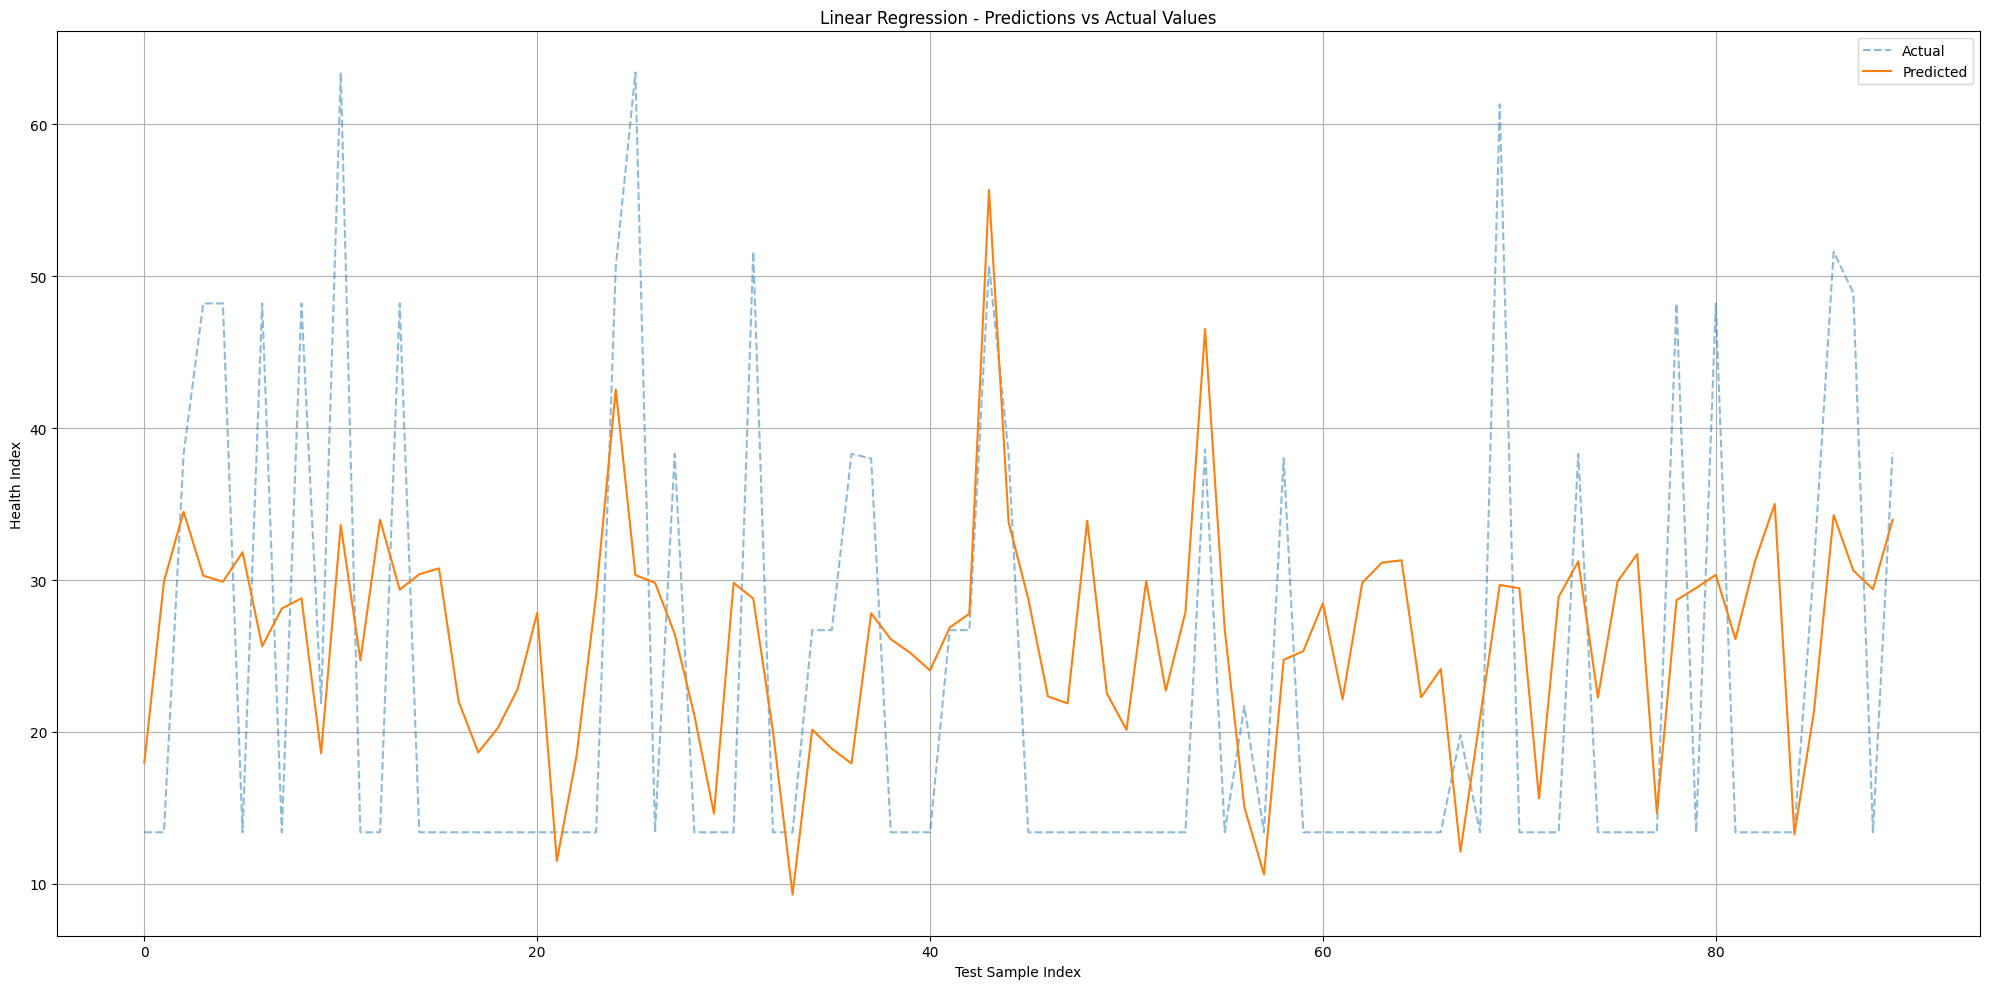

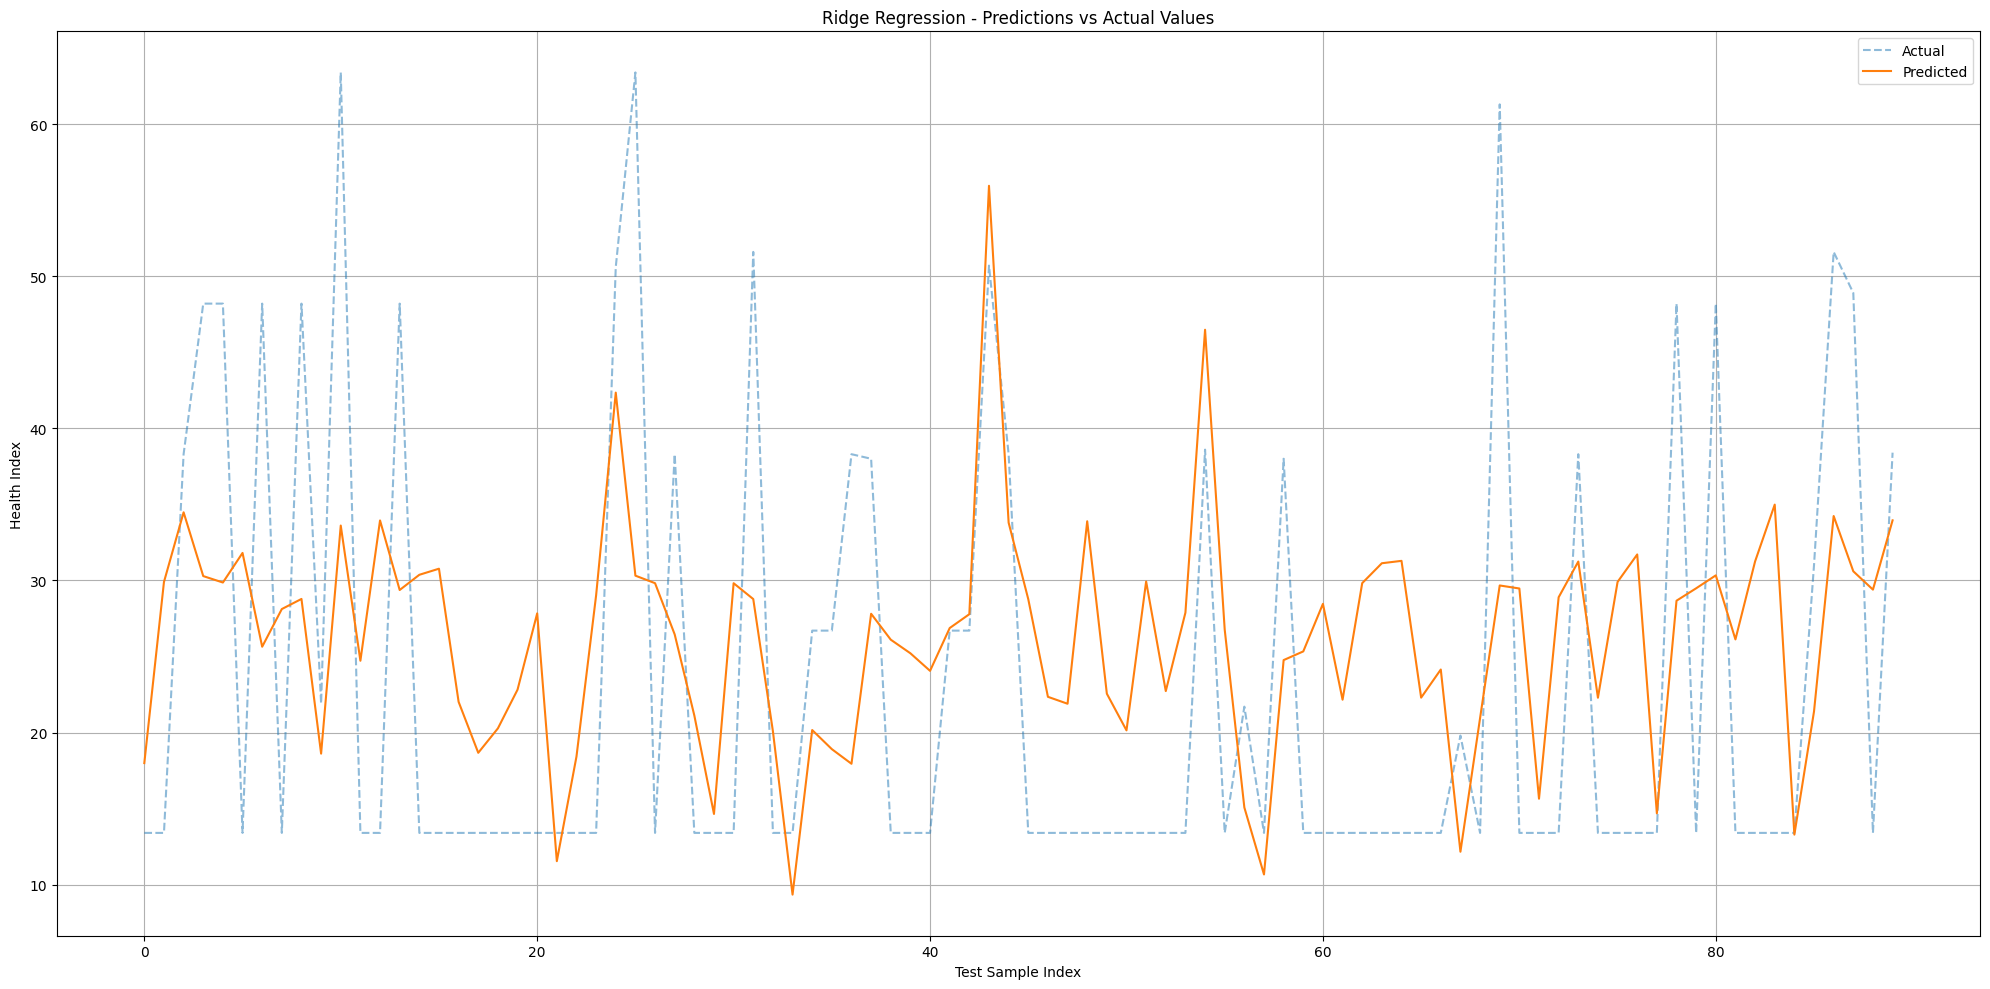

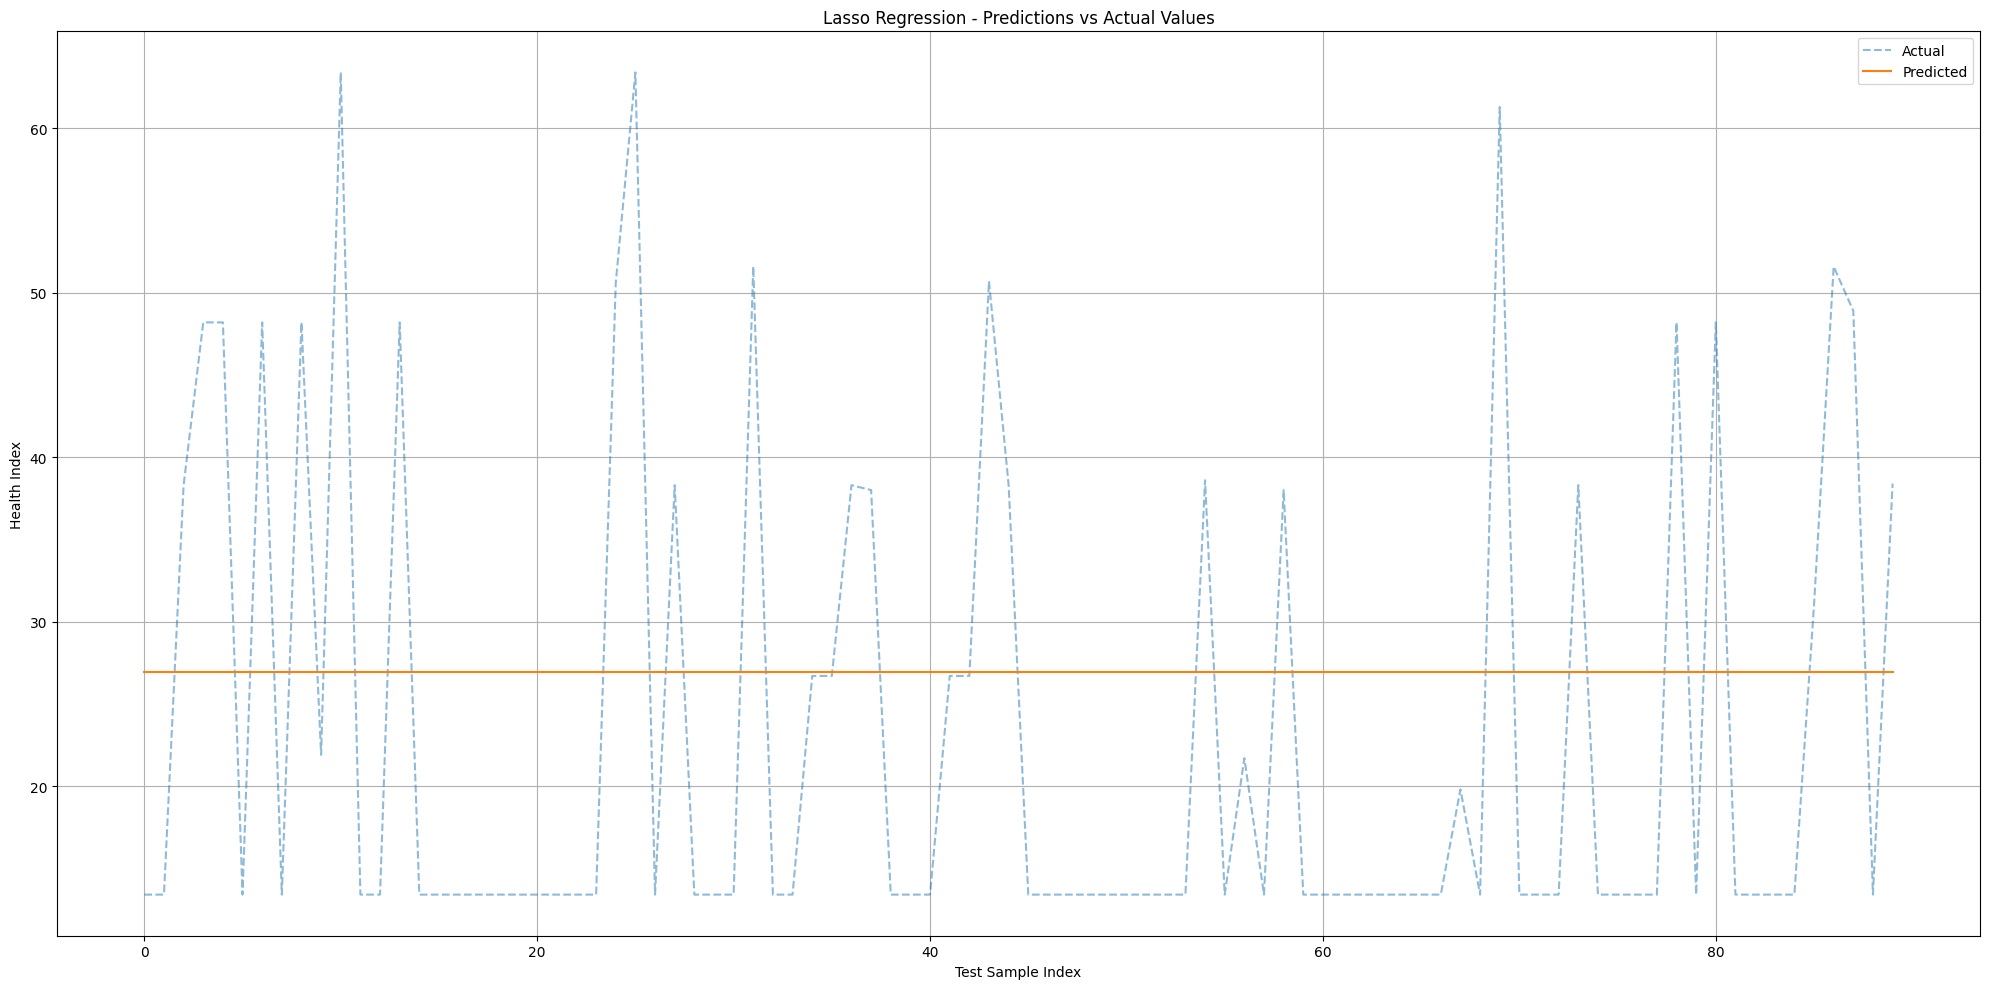

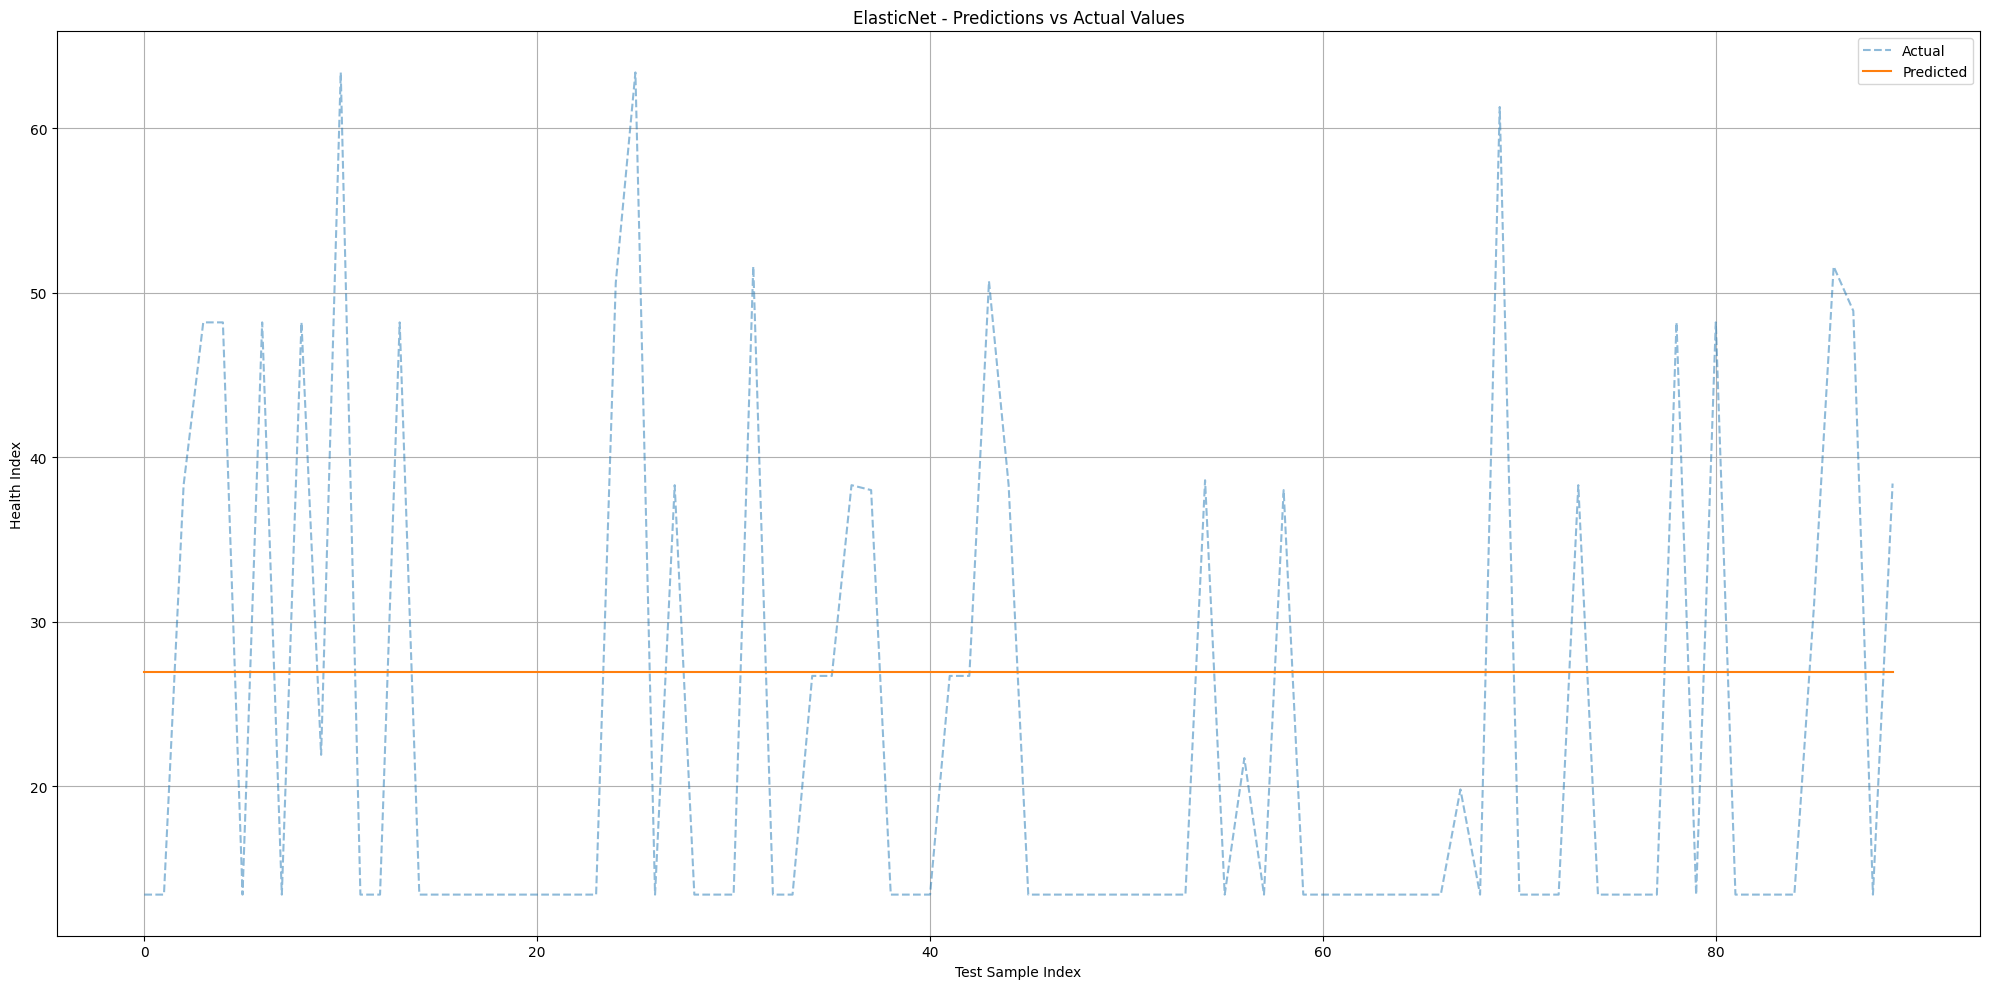

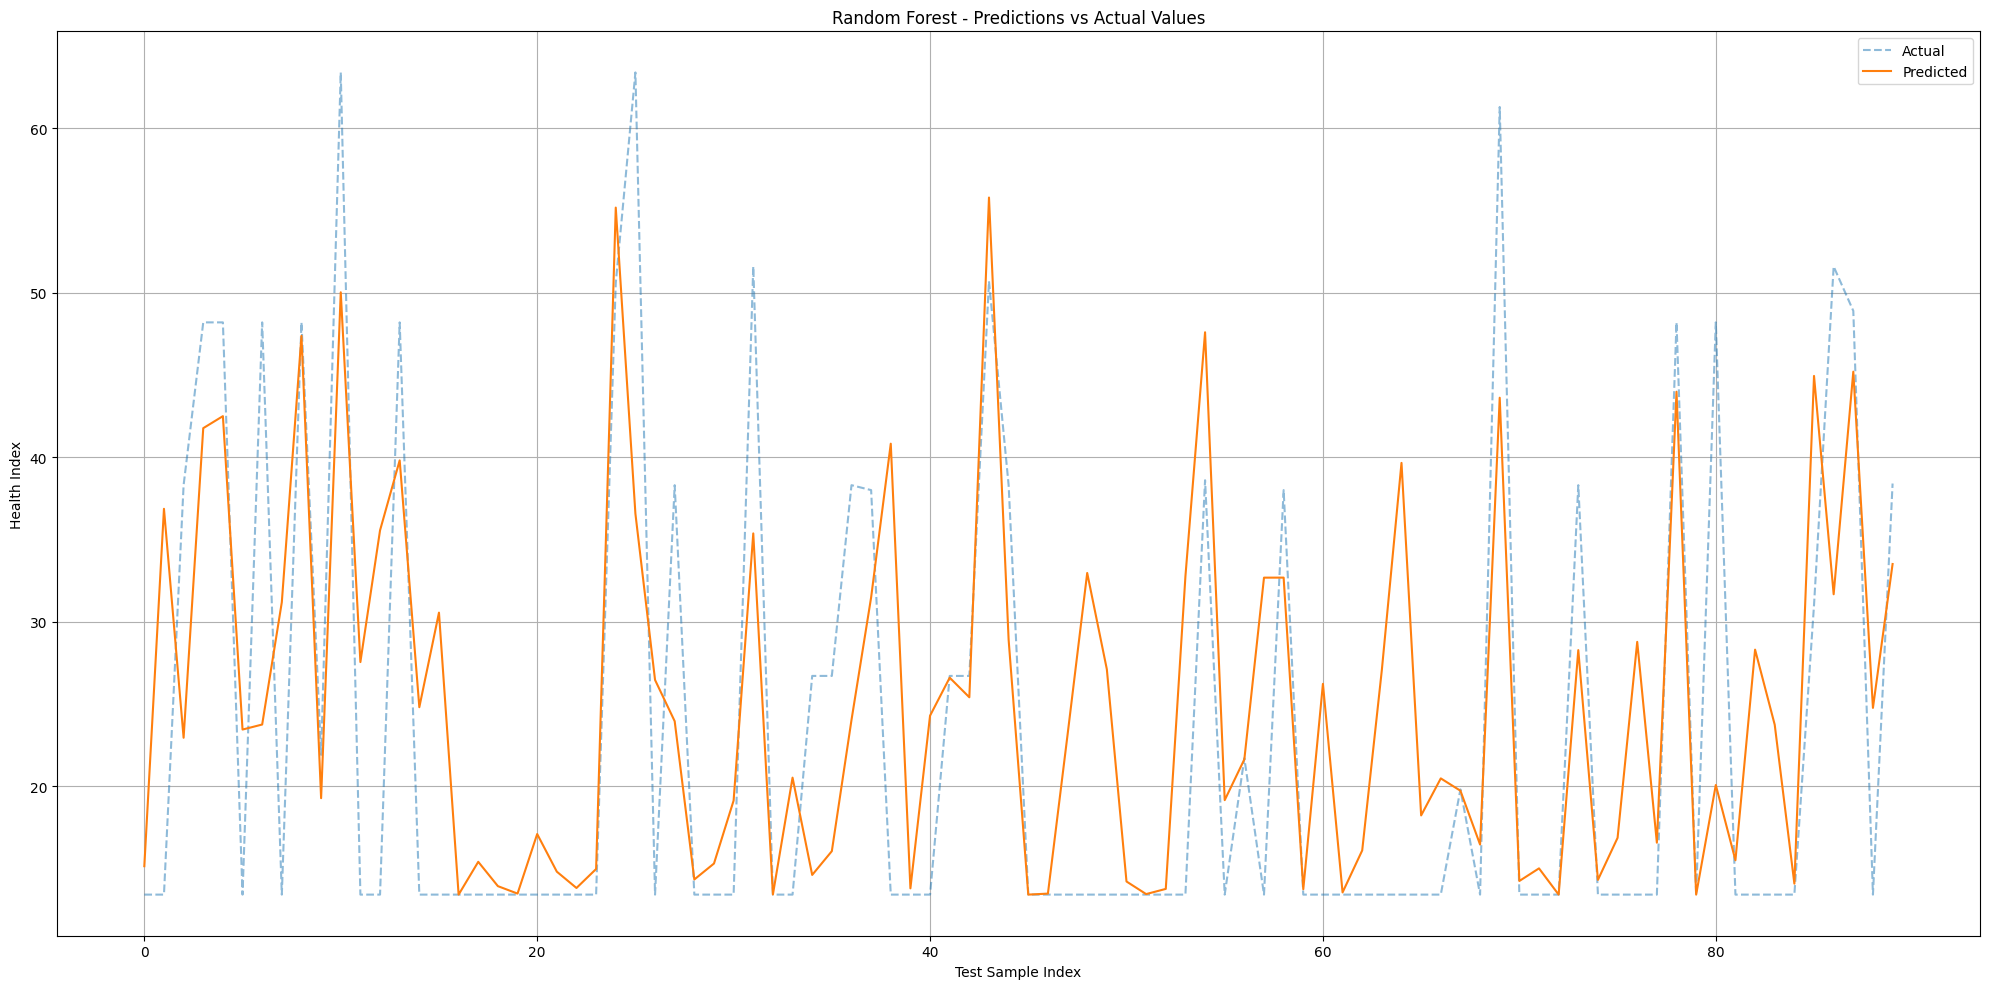

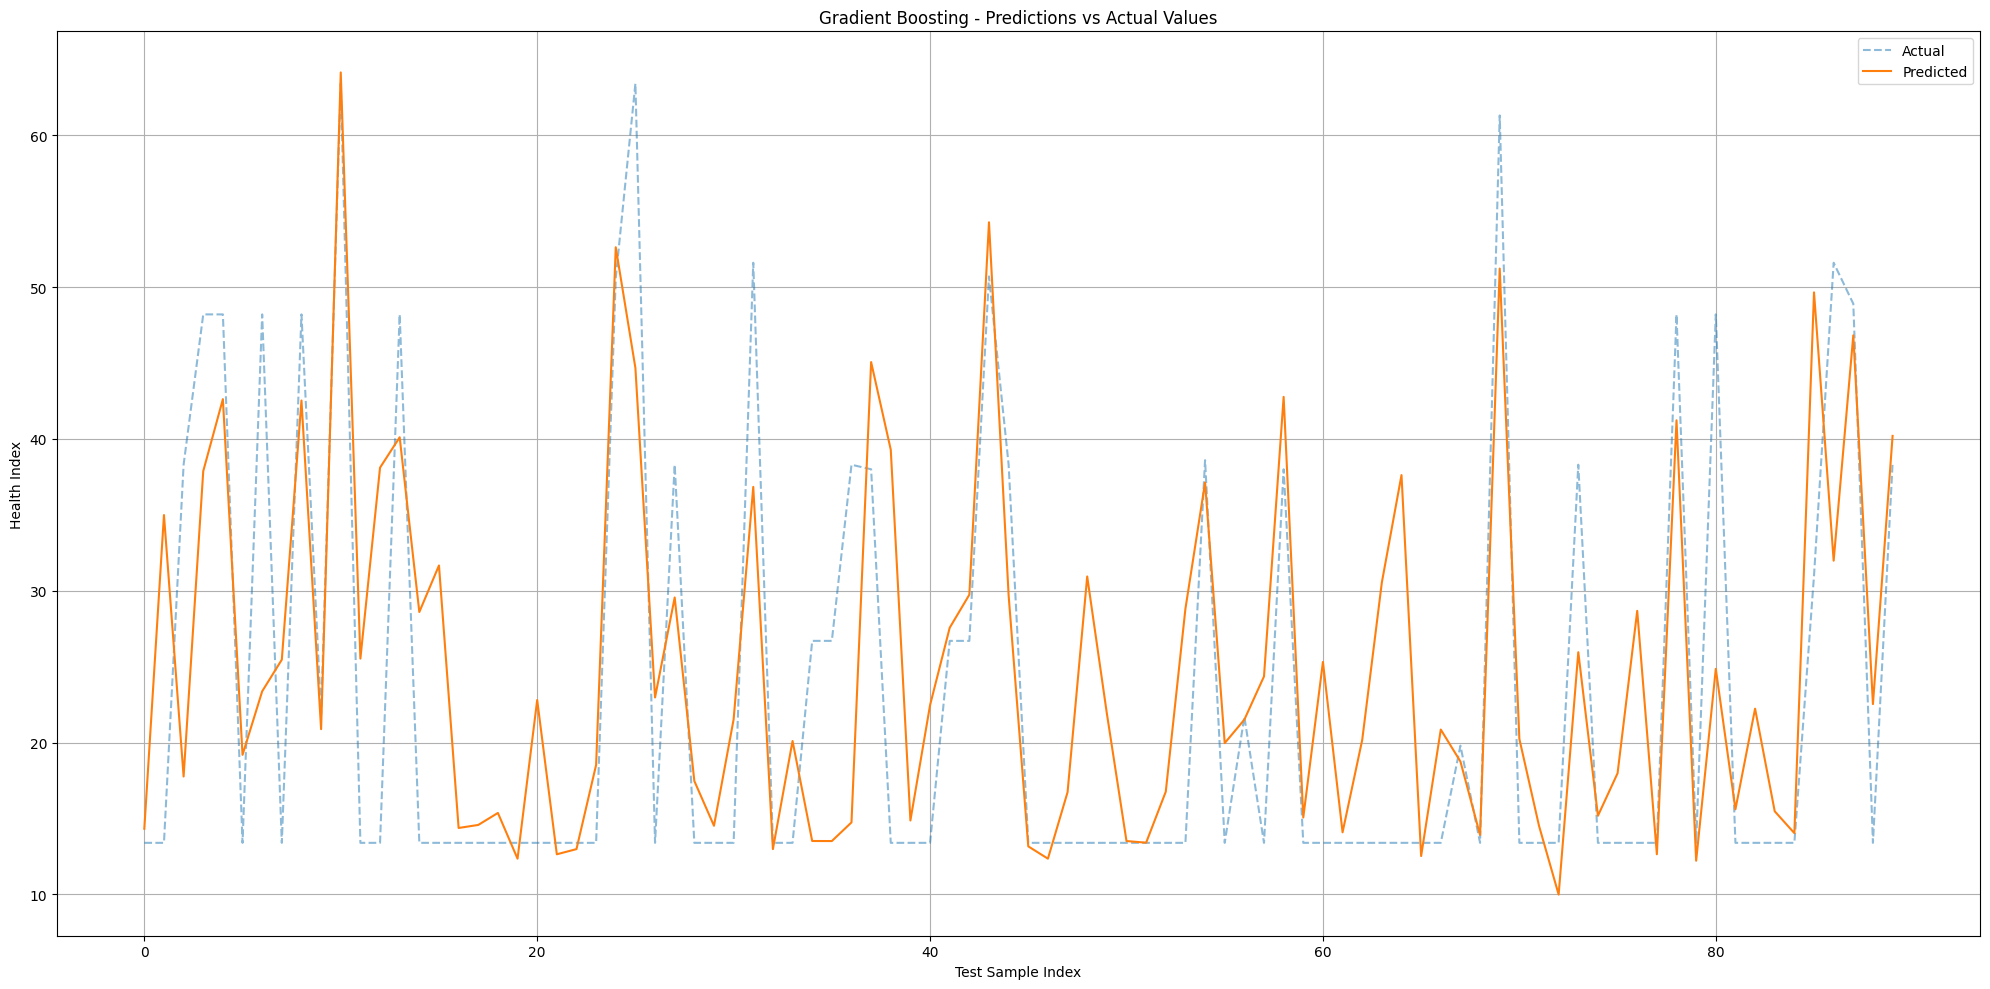

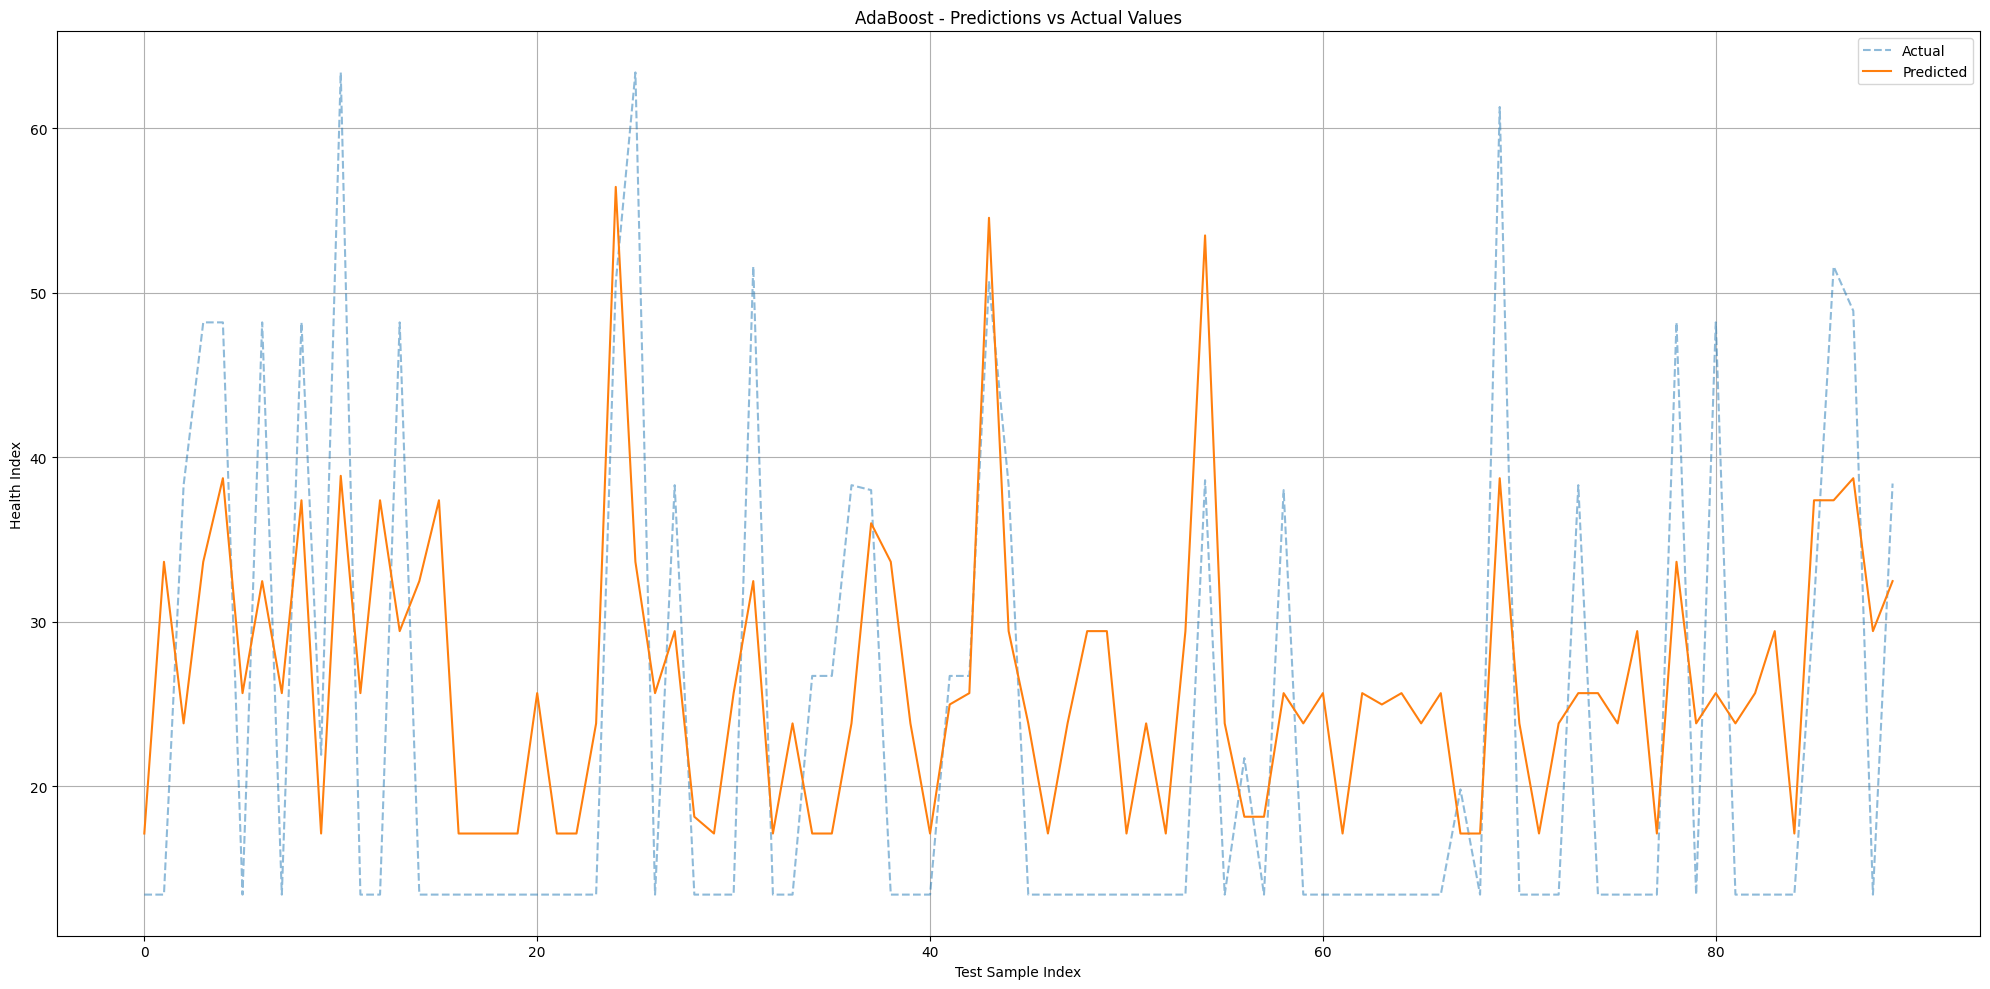

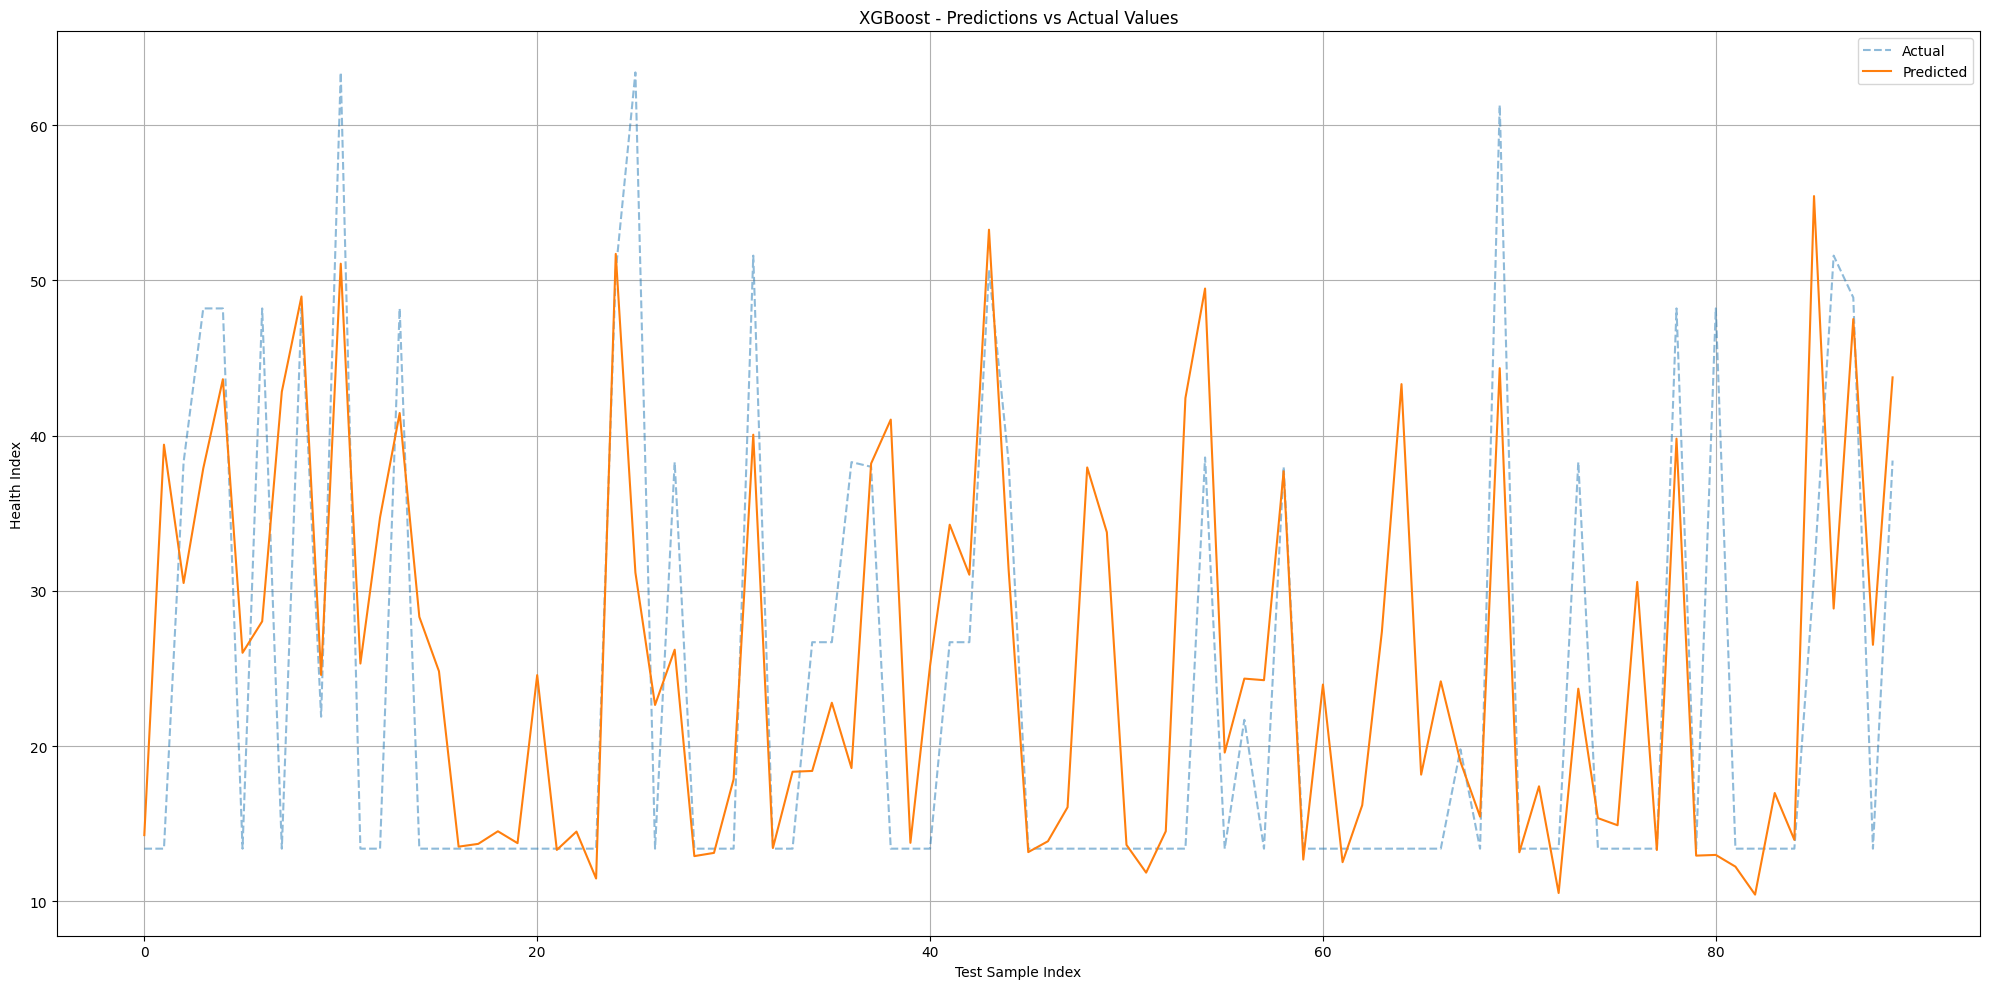

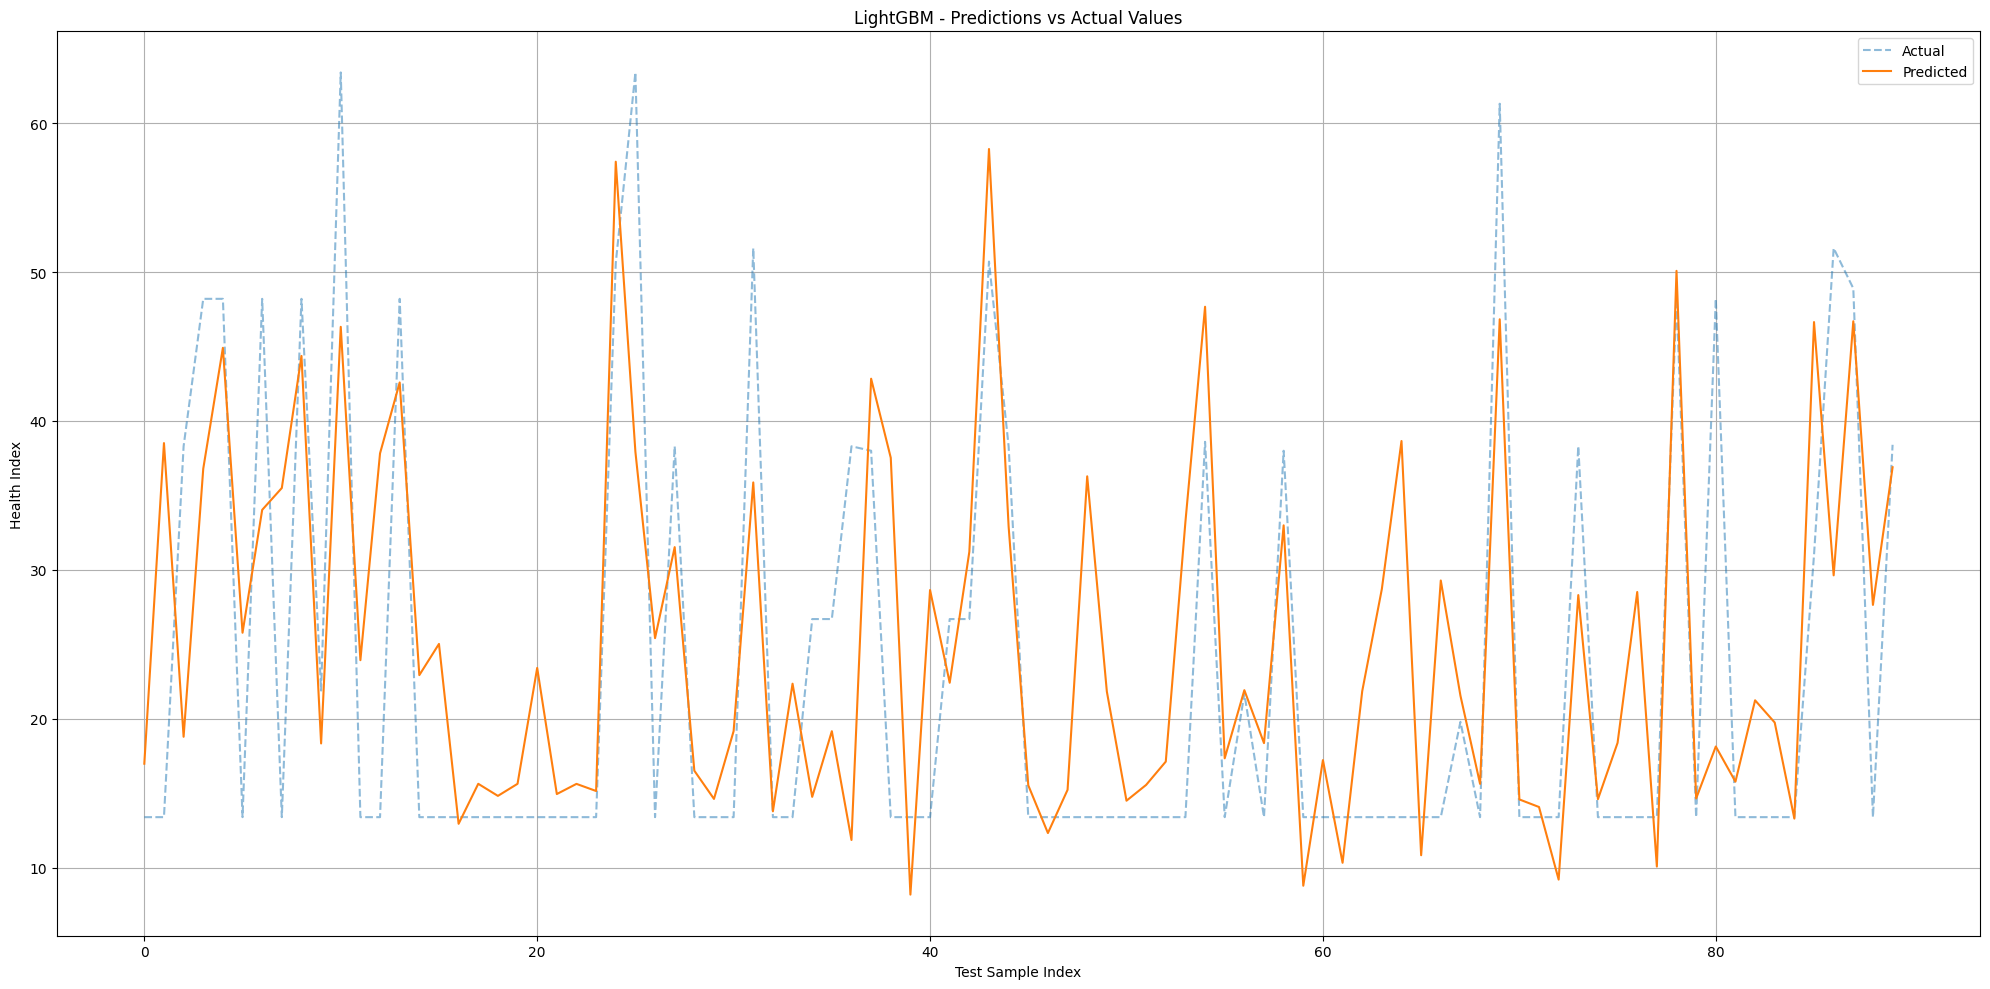

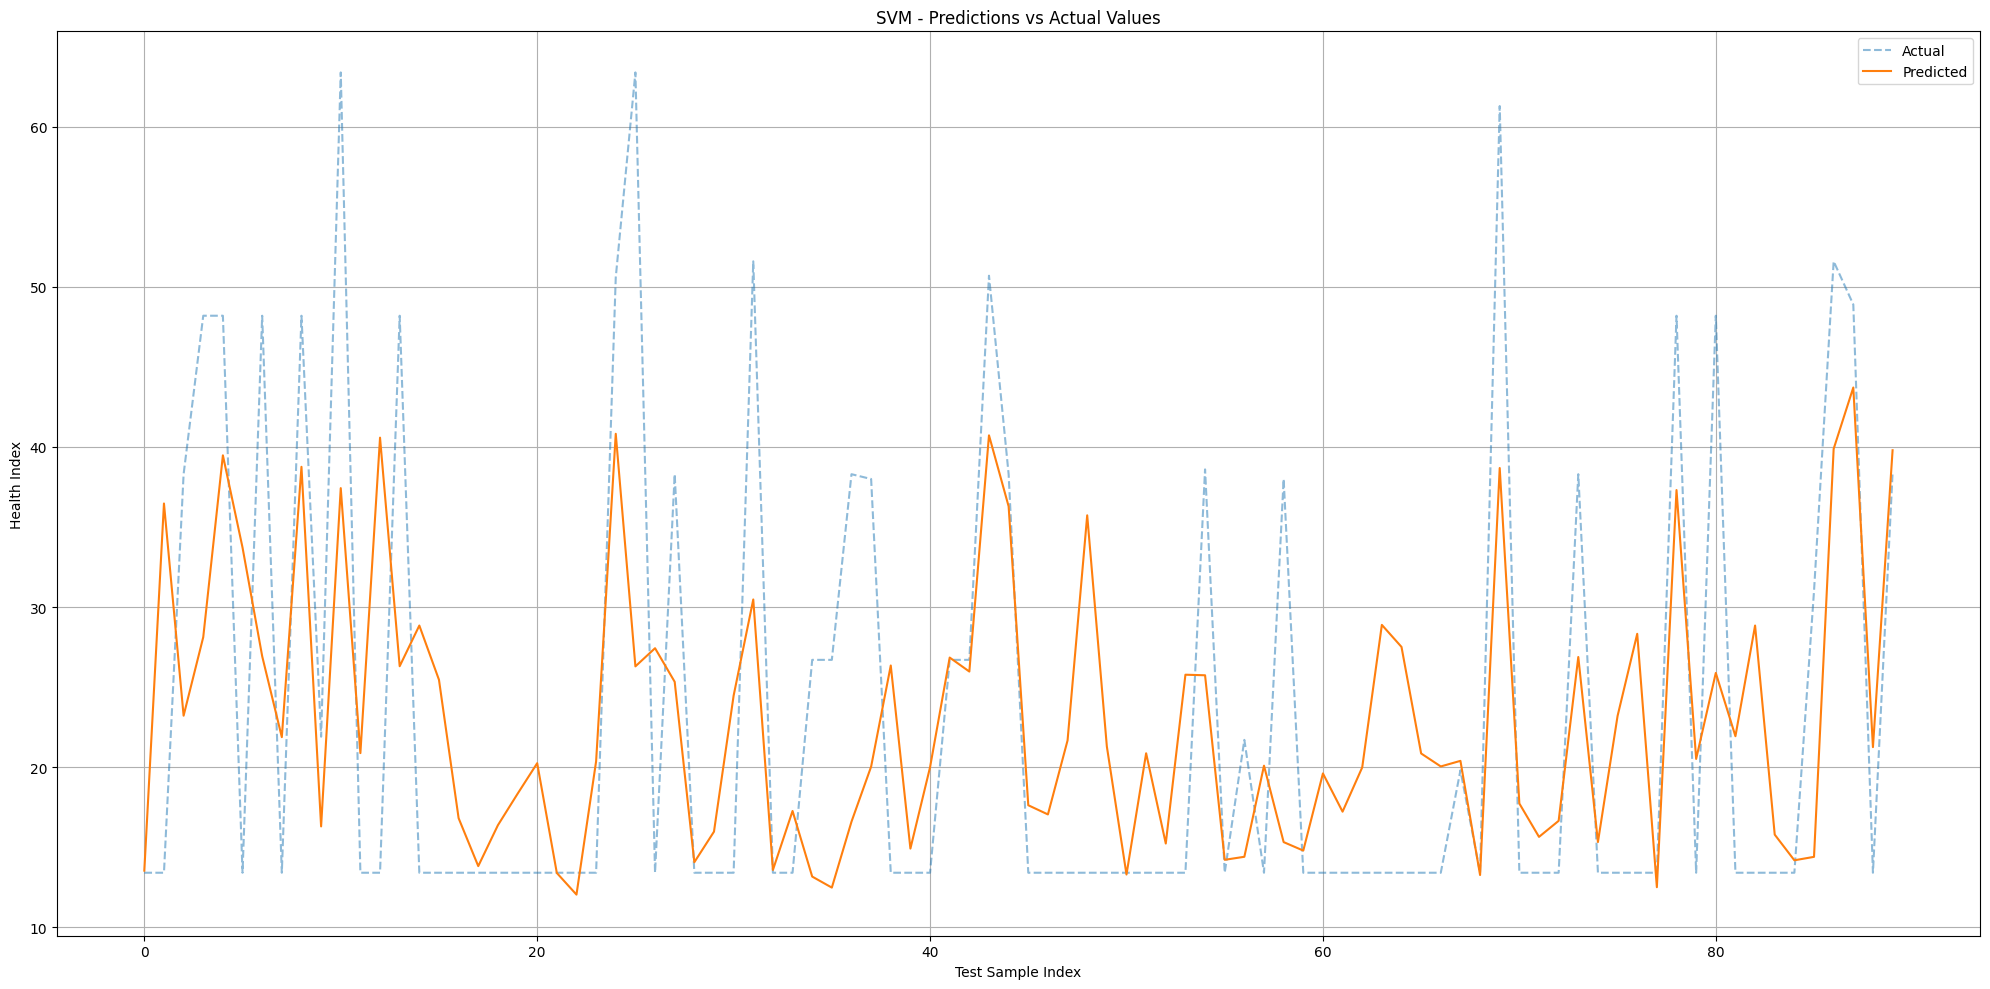

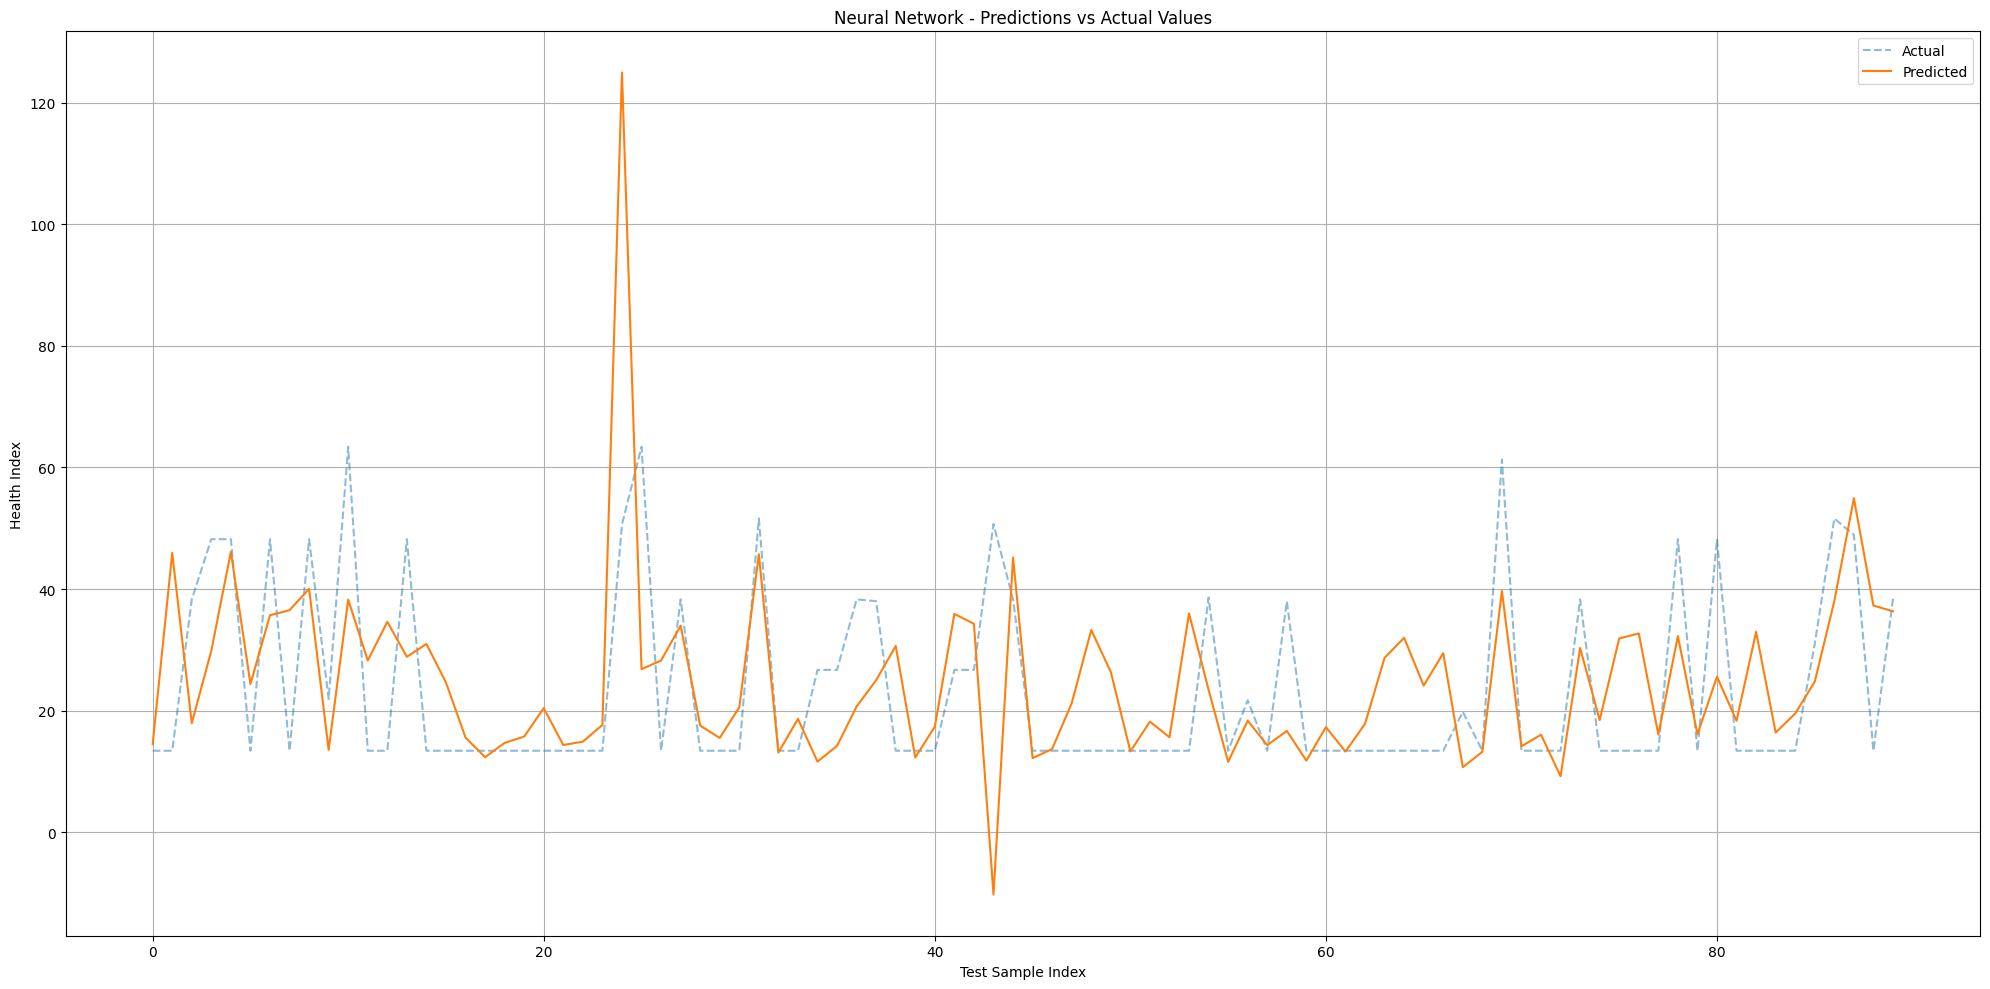

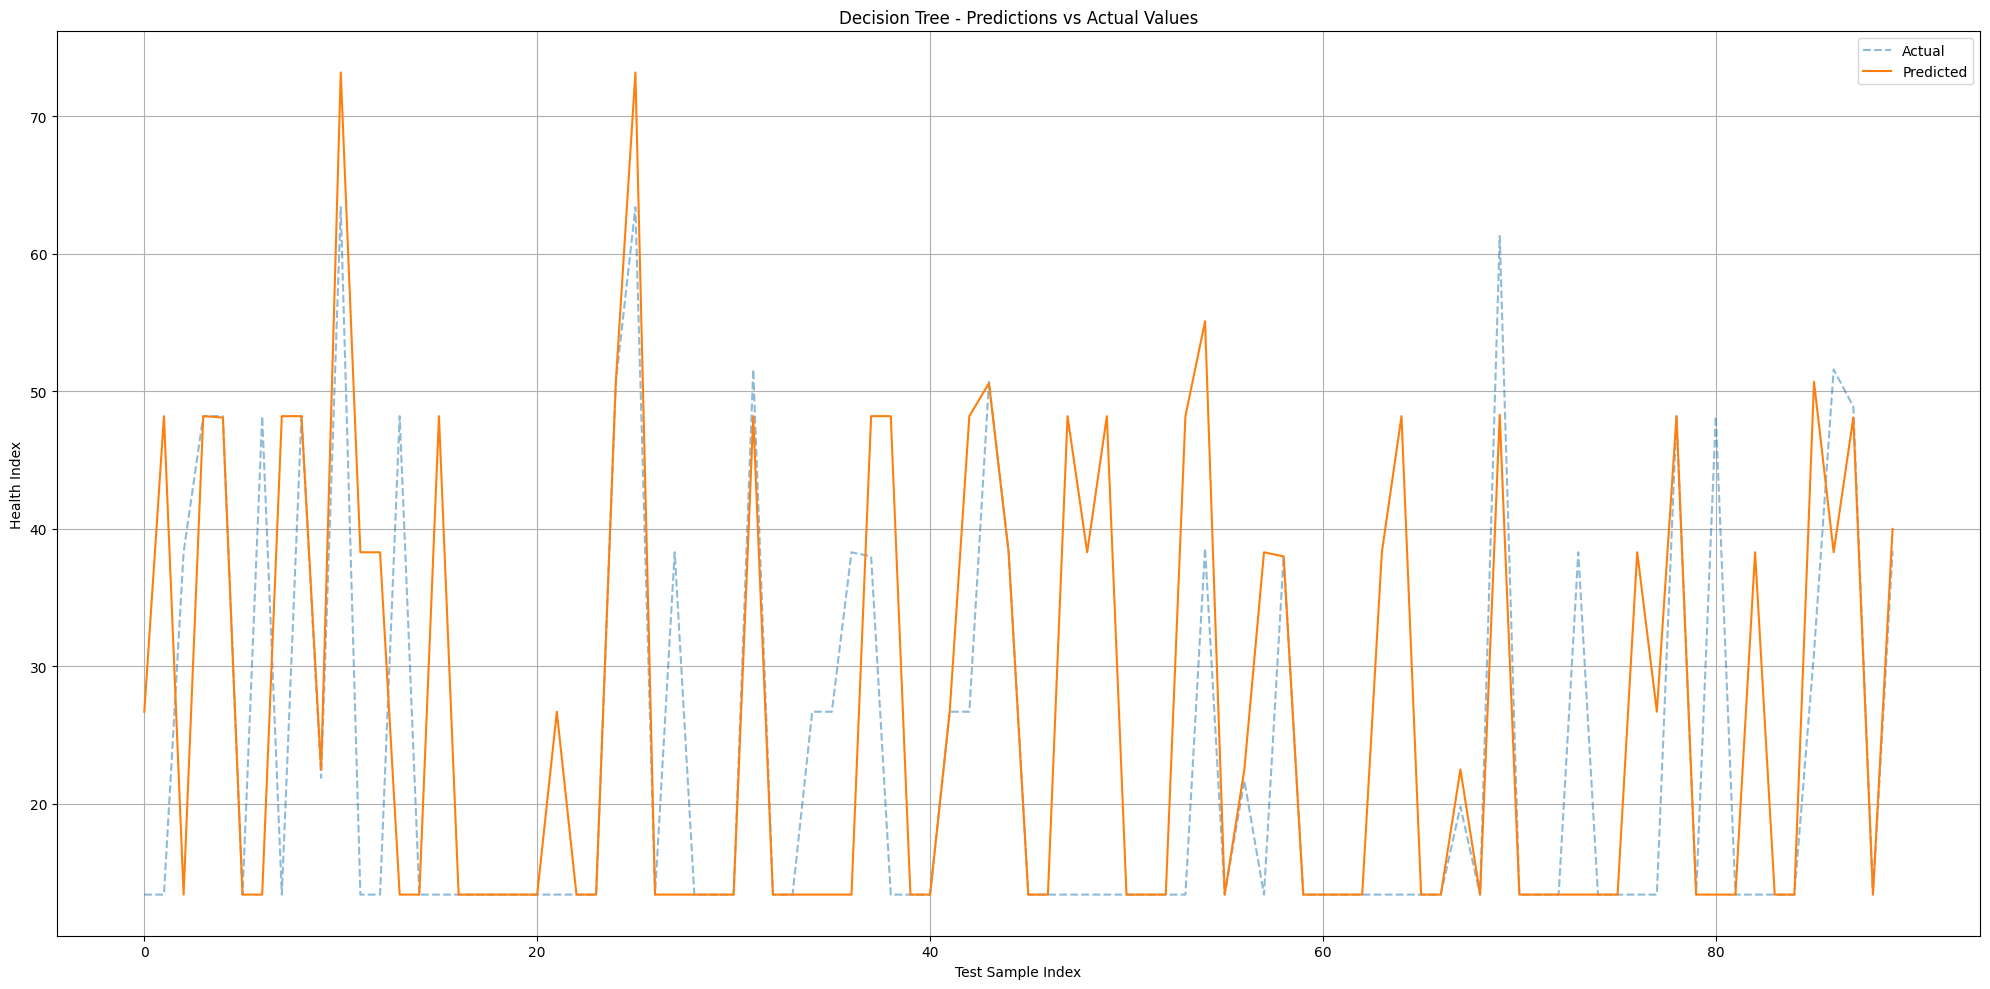

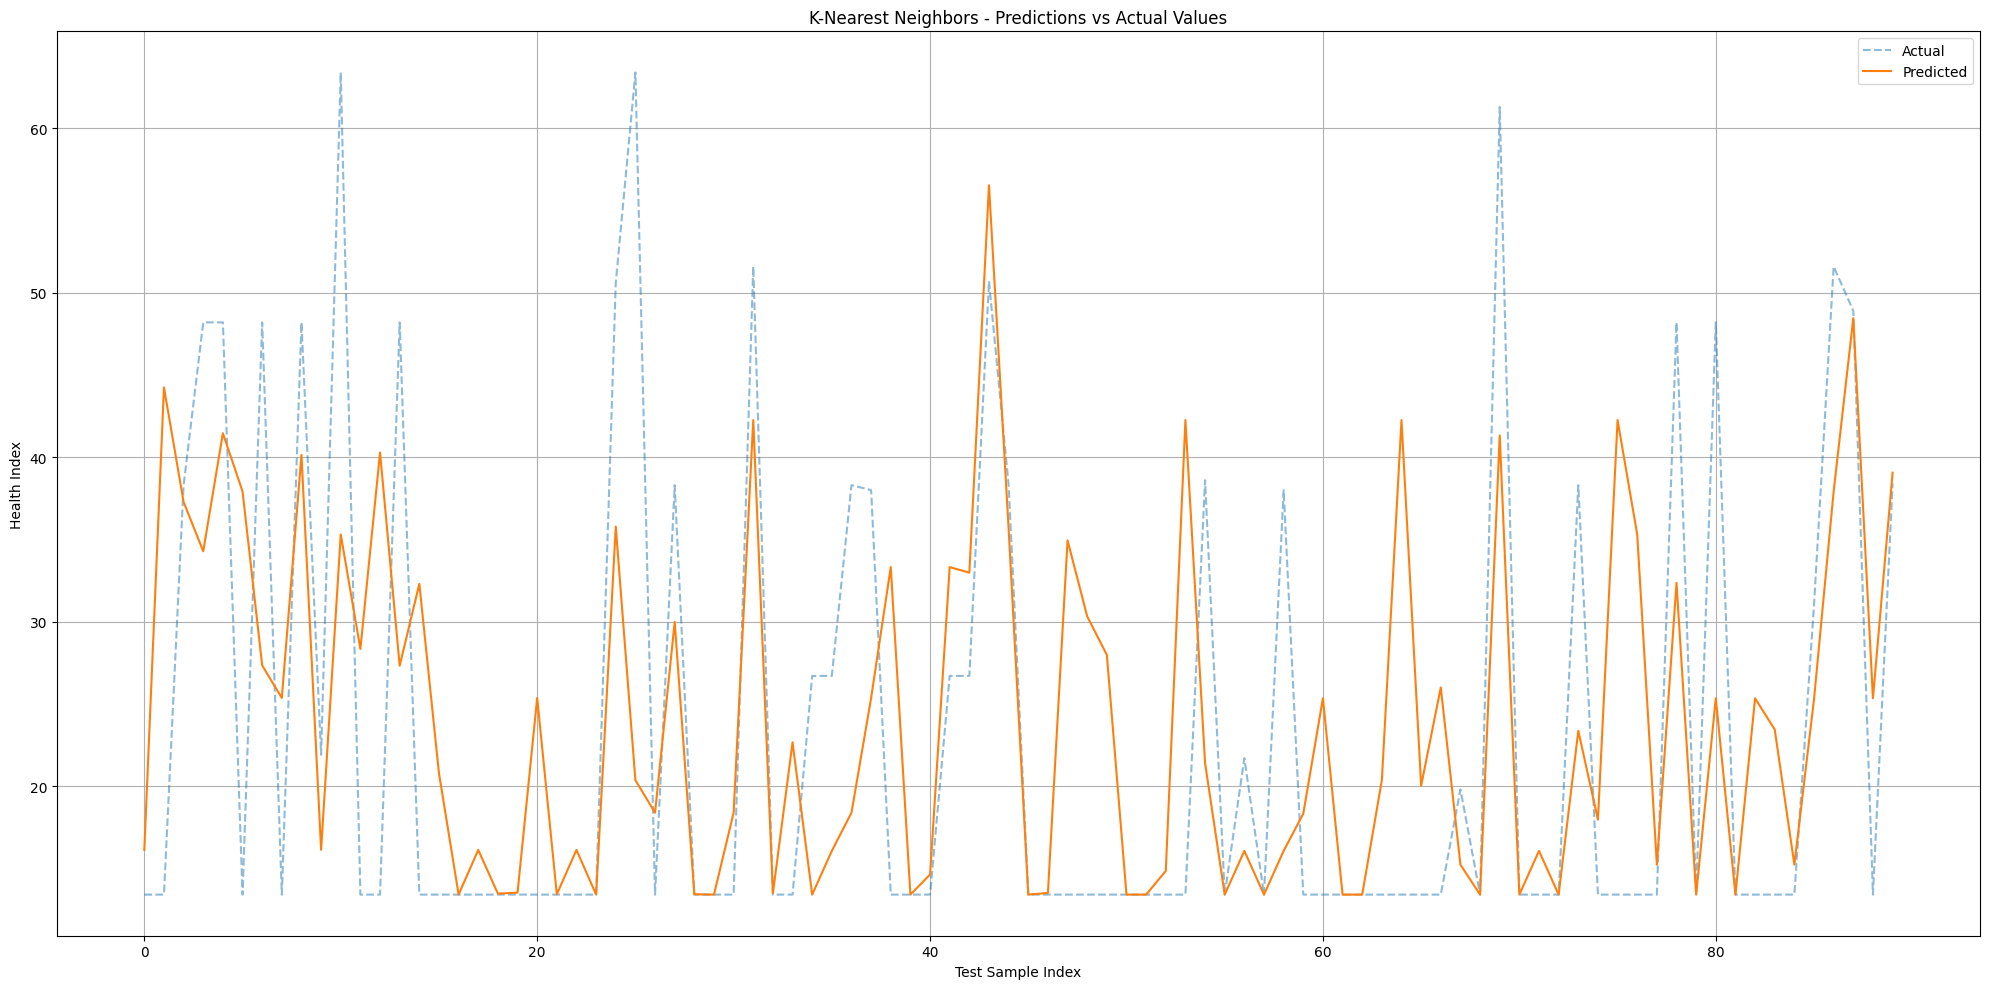

In [28]:
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(x1_test)
    # Convert predictions and actual values back to original scale
    y_pred_original = scaler2.inverse_transform(y_pred.reshape(-1, 1))
    y_test_original = scaler2.inverse_transform(y1_test)
    
    # Create a new figure for each model
    plt.figure(figsize=(20, 10))
    
    # Plot predictions vs actual values
    plt.plot(range(len(y_test_original)), y_test_original, label='Actual', linestyle='--', alpha=0.5)
    plt.plot(range(len(y_pred_original)), y_pred_original, label='Predicted')
    
    plt.xlabel('Test Sample Index')
    plt.ylabel('Health Index')
    plt.title(f'{name} - Predictions vs Actual Values')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [29]:
# Save all models to disk
import joblib
import os

# Create health_index directory if it doesn't exist
os.makedirs('health_index', exist_ok=True)

print("\nSaving models...")
for name, model in models.items():
    filename = f'health_index/{name.replace(" ", "_").lower()}.joblib'
    joblib.dump(model, filename)
    print(f"Saved {name} to {filename}")

# Save the scaler as well since we'll need it for predictions
joblib.dump(scaler2, 'health_index/scaler.joblib')
print("Saved scaler to health_index/scaler.joblib")




Saving models...
Saved Linear Regression to health_index/linear_regression.joblib
Saved Ridge Regression to health_index/ridge_regression.joblib
Saved Lasso Regression to health_index/lasso_regression.joblib
Saved ElasticNet to health_index/elasticnet.joblib
Saved Random Forest to health_index/random_forest.joblib
Saved Gradient Boosting to health_index/gradient_boosting.joblib
Saved AdaBoost to health_index/adaboost.joblib
Saved XGBoost to health_index/xgboost.joblib
Saved LightGBM to health_index/lightgbm.joblib
Saved SVM to health_index/svm.joblib
Saved Neural Network to health_index/neural_network.joblib
Saved Decision Tree to health_index/decision_tree.joblib
Saved K-Nearest Neighbors to health_index/k-nearest_neighbors.joblib
Saved scaler to health_index/scaler.joblib
